##**Import Necceassary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import metrics
import copy

##**Get Data**

In [ ]:
df=pd.read_csv("Combined_stock_data.csv")

In [ ]:
df.shape

(9864, 10)

In [ ]:
df.head()

Unnamed: 0                       Date        Open        High         Low  \
0           0  2013-04-05 00:00:00+05:30  282.877867  284.842979  280.028455   
1           1  2013-04-08 00:00:00+05:30  280.028374  282.352109  277.793060   
2           2  2013-04-09 00:00:00+05:30  278.412096  278.942667  270.816935   
3           3  2013-04-10 00:00:00+05:30  275.410366  277.847109  272.782030   
4           4  2013-04-11 00:00:00+05:30  281.649546  288.439015  278.544661   

        Close    Volume  Dividends  Stock Splits Company_name  
0  281.585815   4372960        0.0           0.0      INFOSYS  
1  278.249939   3716360        0.0           0.0      INFOSYS  
2  271.809326  10840656        0.0           0.0      INFOSYS  
3  276.653290   6551616        0.0           0.0      INFOSYS  
4  286.581970  17018672        0.0           0.0      INFOSYS

In [ ]:
df.sample(5)

Unnamed: 0                       Date         Open         High  \
5944        1012  2017-05-23 00:00:00+05:30   347.258621   351.158984   
4408        1942  2021-02-23 00:00:00+05:30  2845.791563  2901.365943   
2878         412  2014-12-11 00:00:00+05:30  1056.853372  1066.278159   
4434        1968  2021-04-05 00:00:00+05:30  3038.385303  3126.537762   
6408        1476  2019-04-08 00:00:00+05:30   684.661146   693.705652   

              Low        Close   Volume  Dividends  Stock Splits  Company_name  
5944   342.645282   348.726501  4828731        0.0           0.0  TECHMAHINDRA  
4408  2843.875205  2855.564941  3832829        0.0           0.0           TCS  
2878  1051.105428  1053.281982  1938822        0.0           0.0           TCS  
4434  3019.221725  3103.445557  5317862        0.0           0.0           TCS  
6408   679.129073   691.203064  1368825        0.0           0.0  TECHMAHINDRA

In [ ]:
df.columns

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Dividends', 'Stock Splits', 'Company_name'],
      dtype='object')

##**Data** **Cleaning**

In [ ]:
df.drop(['Unnamed: 0'],axis = 1, inplace = True)

In [ ]:
plt.style.use('ggplot')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9864 entries, 0 to 9863
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          9864 non-null   object 
 1   Open          9864 non-null   float64
 2   High          9864 non-null   float64
 3   Low           9864 non-null   float64
 4   Close         9864 non-null   float64
 5   Volume        9864 non-null   int64  
 6   Dividends     9864 non-null   float64
 7   Stock Splits  9864 non-null   float64
 8   Company_name  9864 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 693.7+ KB


In [ ]:
df['Date'] = list(map(lambda x: x.split(' ')[0],df['Date']))

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9864 entries, 0 to 9863
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          9864 non-null   datetime64[ns]
 1   Open          9864 non-null   float64       
 2   High          9864 non-null   float64       
 3   Low           9864 non-null   float64       
 4   Close         9864 non-null   float64       
 5   Volume        9864 non-null   int64         
 6   Dividends     9864 non-null   float64       
 7   Stock Splits  9864 non-null   float64       
 8   Company_name  9864 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 693.7+ KB


In [ ]:
df.head()

Date        Open        High         Low       Close    Volume  \
0 2013-04-05  282.877867  284.842979  280.028455  281.585815   4372960   
1 2013-04-08  280.028374  282.352109  277.793060  278.249939   3716360   
2 2013-04-09  278.412096  278.942667  270.816935  271.809326  10840656   
3 2013-04-10  275.410366  277.847109  272.782030  276.653290   6551616   
4 2013-04-11  281.649546  288.439015  278.544661  286.581970  17018672   

   Dividends  Stock Splits Company_name  
0        0.0           0.0      INFOSYS  
1        0.0           0.0      INFOSYS  
2        0.0           0.0      INFOSYS  
3        0.0           0.0      INFOSYS  
4        0.0           0.0      INFOSYS

In [ ]:
df['Company_name'].unique()

array(['INFOSYS', 'TCS', 'TECHMAHINDRA', 'WIPRO'], dtype=object)

**Company Names**

We are collected stock data for four companies: 
Infosys, TCS, Wipro, and Tech Mahindra

1.   Infosys
2.   TCS
3.   Wipro
4.   Tech Mahindra



In [ ]:
df['Company_name'].value_counts()

INFOSYS         2466
TCS             2466
TECHMAHINDRA    2466
WIPRO           2466
Name: Company_name, dtype: int64

##**Companiwise Analysis**

**Descriptive Statistics**

In [ ]:
df1 = df.loc[df['Company_name']=='INFOSYS']
print('INFOSYS')
df1.describe()

INFOSYS


Open         High          Low        Close        Volume  \
count  2466.000000  2466.000000  2466.000000  2466.000000  2.466000e+03   
mean    742.840295   750.441674   734.896684   742.563116  8.542821e+06   
std     460.226375   464.285852   455.659723   459.940285  7.878178e+06   
min     216.751793   219.876353   214.786682   217.341354  0.000000e+00   
25%     418.412103   421.611441   413.349953   417.841354  5.223400e+06   
50%     518.619344   523.668440   512.439174   518.907837  6.881407e+06   
75%    1026.577824  1038.084223  1013.823509  1026.925720  9.446117e+06   
max    1897.498144  1912.523059  1889.618568  1898.427979  1.663204e+08   

         Dividends  Stock Splits  
count  2466.000000   2466.000000  
mean      0.073145      0.002433  
std       0.865193      0.069730  
min       0.000000      0.000000  
25%       0.000000      0.000000  
50%       0.000000      0.000000  
75%       0.000000      0.000000  
max      16.500000      2.000000

**Infosys**
1. Minimum stock price of Infosys share over the last 10 years is 217.34

2. Maximum stock price of Infosys share over the last 10 years is 1898.42

3. Mean stock price of Infosys share over the last 10 years is 742.56

4. The minimum volume of stock trading for Infosys shares over the last 10 years was 0.00

5. The maximum volume of stock trading for Infosys shares over the last 10 years was 1.663204e+08

In [ ]:
df1 = df.loc[df['Company_name']=='TCS']
print('TCS')
df1.describe()

TCS


Open         High          Low        Close        Volume  \
count  2466.000000  2466.000000  2466.000000  2466.000000  2.466000e+03   
mean   1790.107262  1808.069276  1770.707395  1789.214703  2.717726e+06   
std     923.008465   930.528824   914.075475   922.232514  2.385397e+06   
min     553.193988   560.083597   553.193988   554.956848  0.000000e+00   
25%    1063.361892  1071.503238  1052.467577  1061.816101  1.671307e+06   
50%    1406.280926  1433.202320  1394.121469  1414.929565  2.281817e+06   
75%    2521.703338  2548.673317  2493.024745  2518.440491  3.151913e+06   
max    3900.098957  3908.848273  3847.939126  3885.789551  8.806715e+07   

         Dividends  Stock Splits  
count  2466.000000   2466.000000  
mean      0.161091      0.000811  
std       1.935019      0.040275  
min       0.000000      0.000000  
25%       0.000000      0.000000  
50%       0.000000      0.000000  
75%       0.000000      0.000000  
max      67.000000      2.000000

**TCS**

1. Minimum stock price of TCS share over the last 10 years is 554.95

2. Maximum stock price of TCS share over the last 10 years is 3875.78

3. Mean stock price of TCS share over the last 10 years is 1789.21

4. The minimum volume of stock trading for TCS shares over the last 10 years was 0.00

5. The maximum volume of stock trading for TCS shares over the last 10 years was 8.806715e+07

In [ ]:
df1 = df.loc[df['Company_name']=='TECHMAHINDRA']
print('TECHMAHINDRA')
df1.describe()

TECHMAHINDRA


Open         High          Low        Close        Volume  \
count  2466.000000  2466.000000  2466.000000  2466.000000  2.466000e+03   
mean    639.846755   648.246366   630.904538   639.460447  3.082317e+06   
std     324.832420   328.819973   320.173081   324.509619  2.364493e+06   
min     184.125202   188.753627   180.901487   183.892761  0.000000e+00   
25%     402.133674   406.829439   396.053556   401.225739  1.738227e+06   
50%     540.159551   546.620422   530.812637   539.748657  2.539573e+06   
75%     758.709802   769.624651   749.785970   755.388214  3.732722e+06   
max    1744.346135  1780.676579  1730.298351  1749.771362  4.109539e+07   

         Dividends  Stock Splits  
count  2466.000000   2466.000000  
mean      0.066200      0.000811  
std       0.930605      0.040275  
min       0.000000      0.000000  
25%       0.000000      0.000000  
50%       0.000000      0.000000  
75%       0.000000      0.000000  
max      18.000000      2.000000

**Tech Mahindra**

1. Minimum stock price of Tech Mahindra share over the last 10 years is 183.89

2. Maximum stock price of Tech Mahindra share over the last 10 years is 1749.75

3. Mean stock price of Tech Mahindra share over the last 10 years is 639.46

4. The minimum volume of stock trading for Tech Mahindra shares over the last 10 years was 0.00

5. The maximum volume of stock trading for Tech Mahindra shares over the last 10 years was 4.109539e+07	

In [ ]:
df1 = df.loc[df['Company_name']=='WIPRO']
print('WIPRO')
df1.describe()

WIPRO


Open         High          Low        Close        Volume  \
count  2466.000000  2466.000000  2466.000000  2466.000000  2.466000e+03   
mean    276.227928   279.216282   272.838620   275.928732  6.200034e+06   
std     133.986124   135.294236   132.272820   133.618540  6.976312e+06   
min     111.056594   113.541656   107.920234   111.382202  0.000000e+00   
25%     194.405426   196.507885   192.292730   194.381802  3.093749e+06   
50%     214.444526   216.409364   211.980916   214.182465  4.529192e+06   
75%     332.539034   335.027376   328.597113   330.777466  6.925814e+06   
max     713.859379   730.748980   707.192454   712.624756  1.303676e+08   

         Dividends  Stock Splits  
count  2466.000000   2466.000000  
mean      0.009276      0.001352  
std       0.146403      0.048395  
min       0.000000      0.000000  
25%       0.000000      0.000000  
50%       0.000000      0.000000  
75%       0.000000      0.000000  
max       5.000000      2.000000

**Wipro**

1. Minimum stock price of Wipro share over the last 10 years is 111.38

2. Maximum stock price of Wipro share over the last 10 years is 712.624756

3. Mean stock price of Wipro share over the last 10 years is 275.92

4. The minimum volume of stock trading for Wipro shares over the last 10 years was 0.00

5. The maximum volume of stock trading for Wipro shares over the last 10 years was 1.303676e+08

#**EDA - Univariate Analysis** 
##**Closing Price**

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

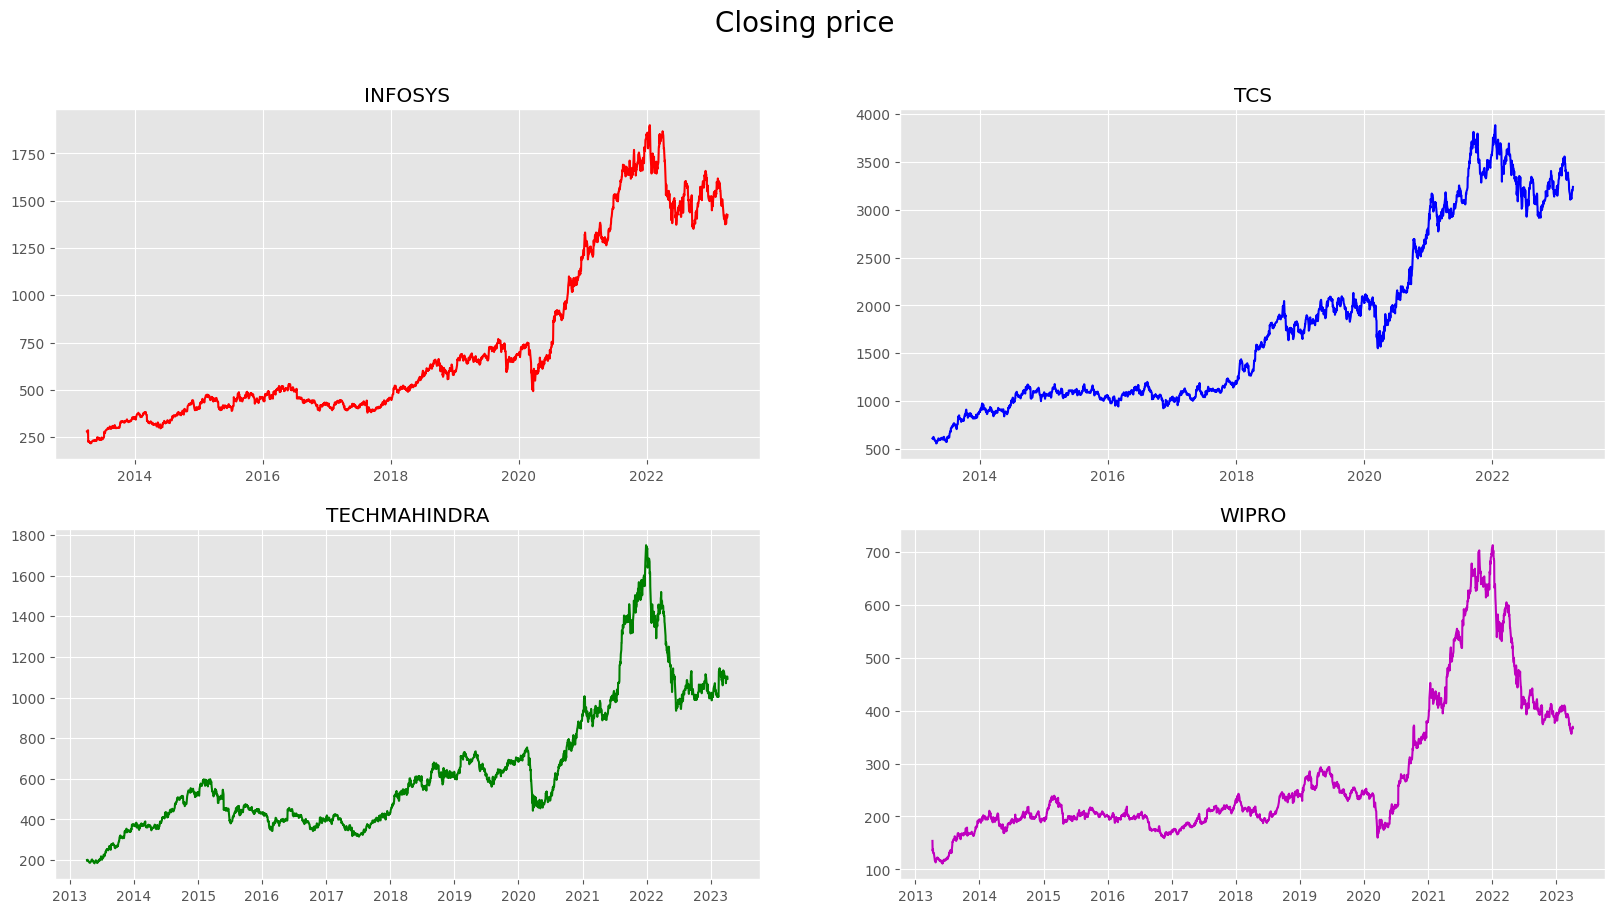

In [ ]:
Company_name = ['INFOSYS', 'TCS', 'TECHMAHINDRA', 'WIPRO']
color = ['r','b','g','m']
i = 1
plt.figure(figsize=(20,10))
plt.suptitle('Closing price',size=20)
for cn in Company_name:
  df1 = df.loc[df['Company_name']==cn]
  plt.subplot(2,2,i)
  plt.plot(df1['Date'],df1['Close'],color[i-1])
  plt.title(f'{cn}')
  i=i+1

##**Detection of  anomalies in the market**

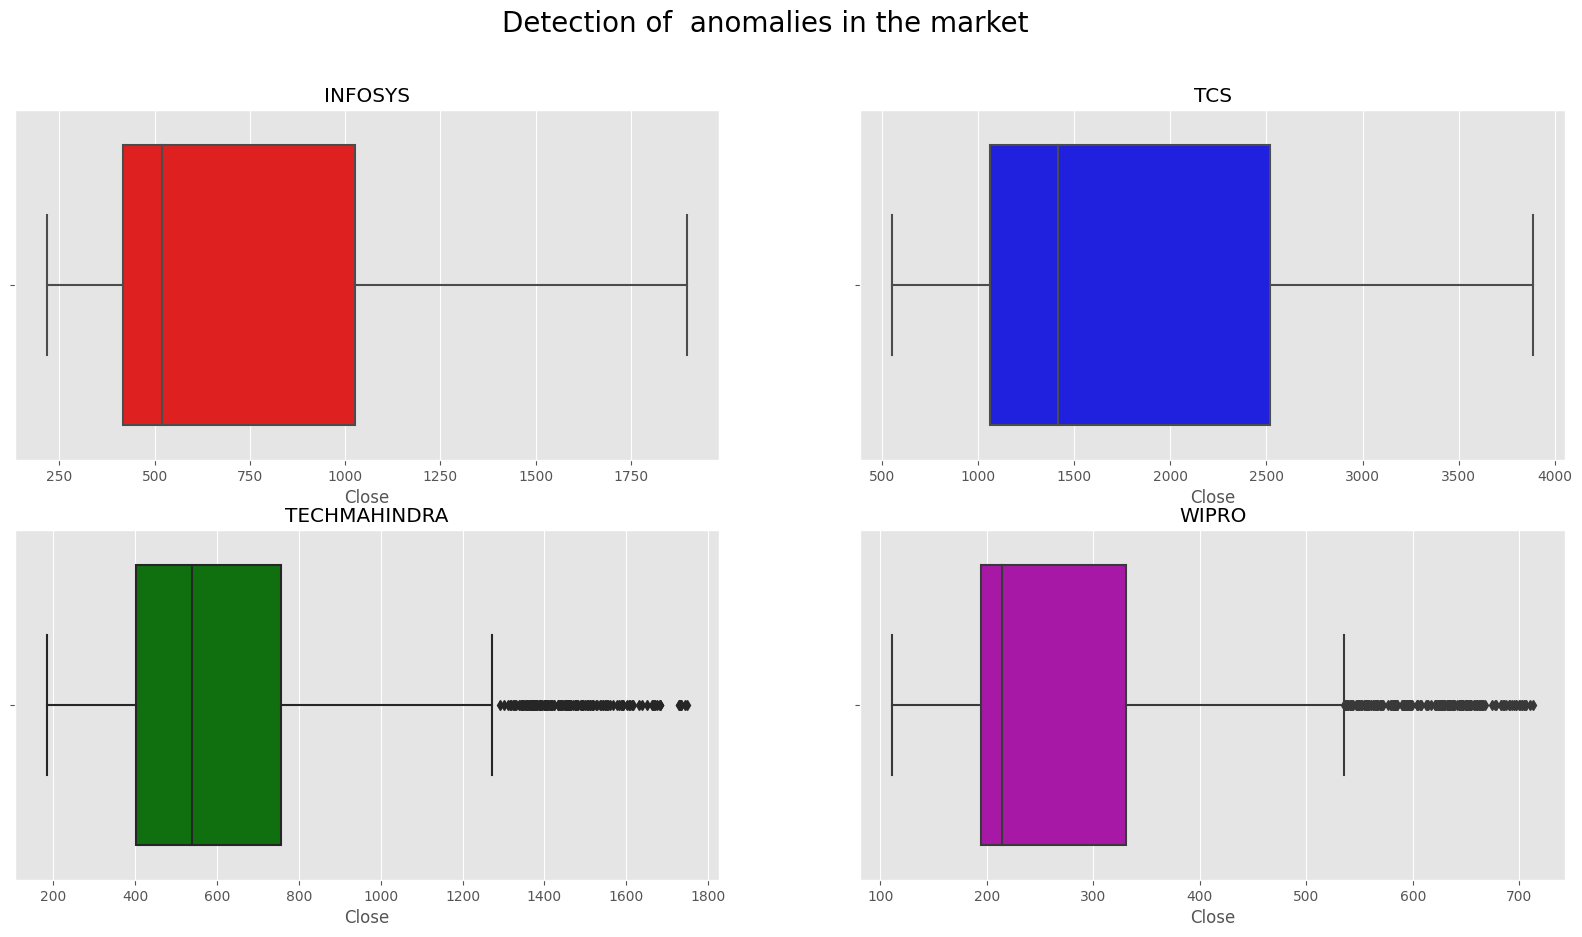

In [ ]:
i = 1
plt.figure(figsize=(20,10))
plt.suptitle('Detection of  anomalies in the market',size=20)
for cn in Company_name:
  plt.subplot(2,2,i)
  sns.boxplot(data = df.loc[df['Company_name']==cn],x='Close',color=color[i-1])
  plt.title(f'{cn}')
  i=i+1

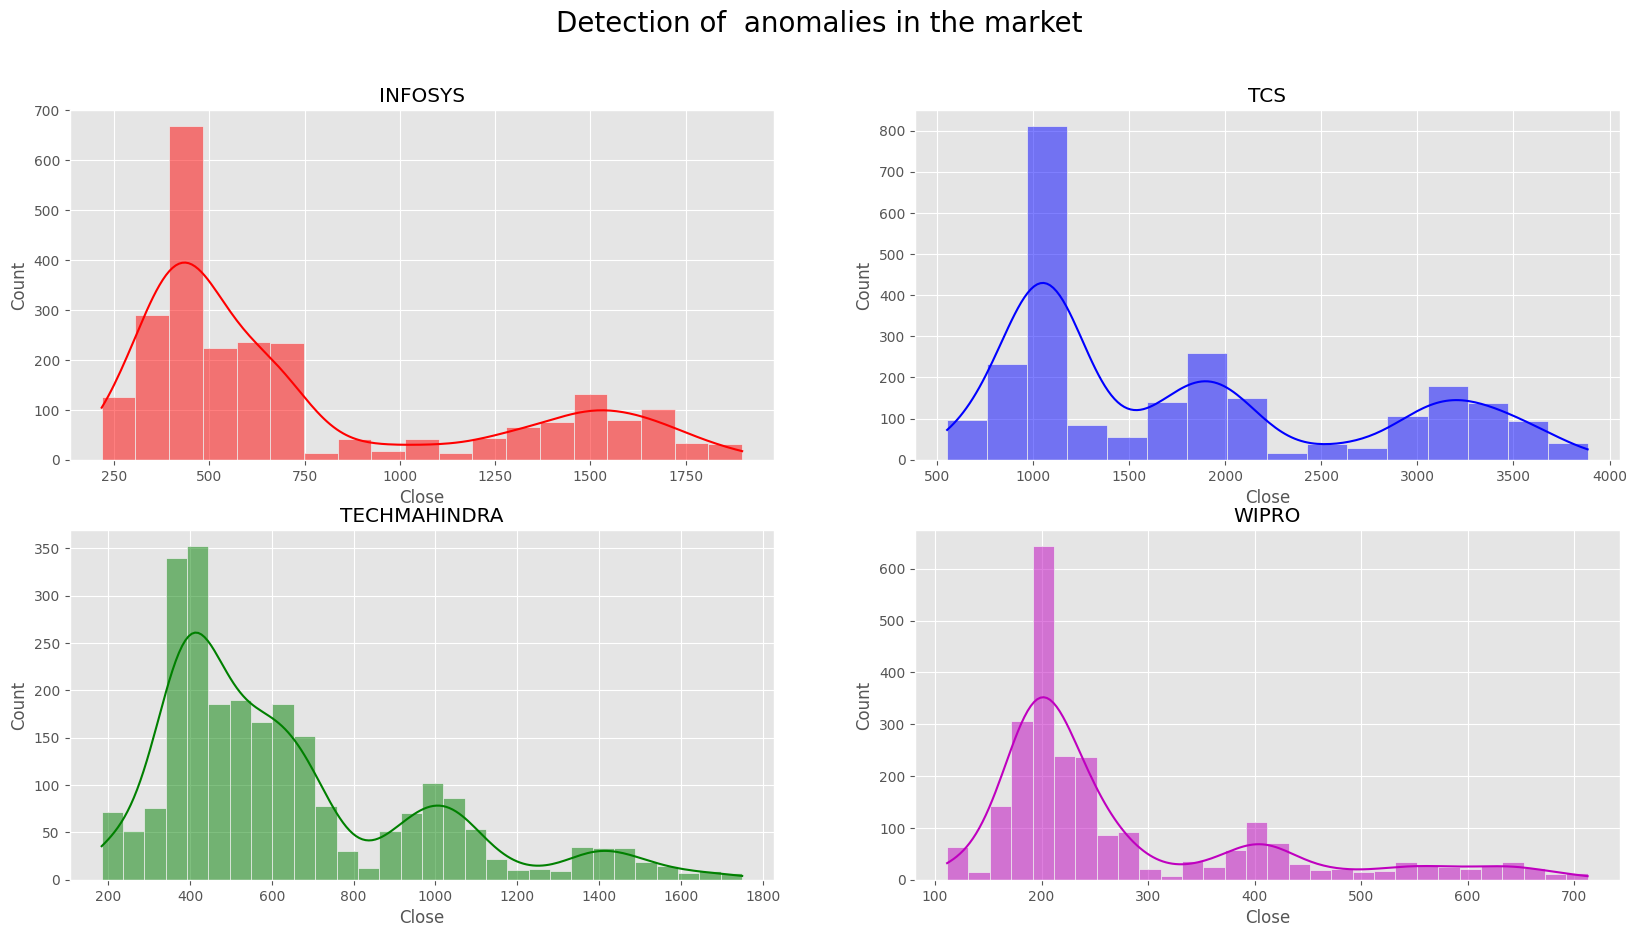

In [ ]:
i = 1
plt.figure(figsize=(20,10))
plt.suptitle('Detection of  anomalies in the market',size=20)
for cn in Company_name:
  plt.subplot(2,2,i)
  sns.histplot(data = df.loc[df['Company_name']==cn],x='Close',color=color[i-1],kde=True)
  plt.title(f'{cn}')
  i=i+1

**Conclusion**

Based on the above graphs, it can be concluded that Infosys and TCS do not have any outliers, indicating that there are no days with unusually high or low stock prices. However, for Wipro and Tech Mahindra, there are fewer days with the highest stock prices.

To determine the reasons behind the anomalies in Wipro and Tech Mahindra stock prices, further investigation may be needed. There are several possible factors that could have caused unusual stock price movements on specific days,

##**Daily Returns of Stocks on Closing Price**

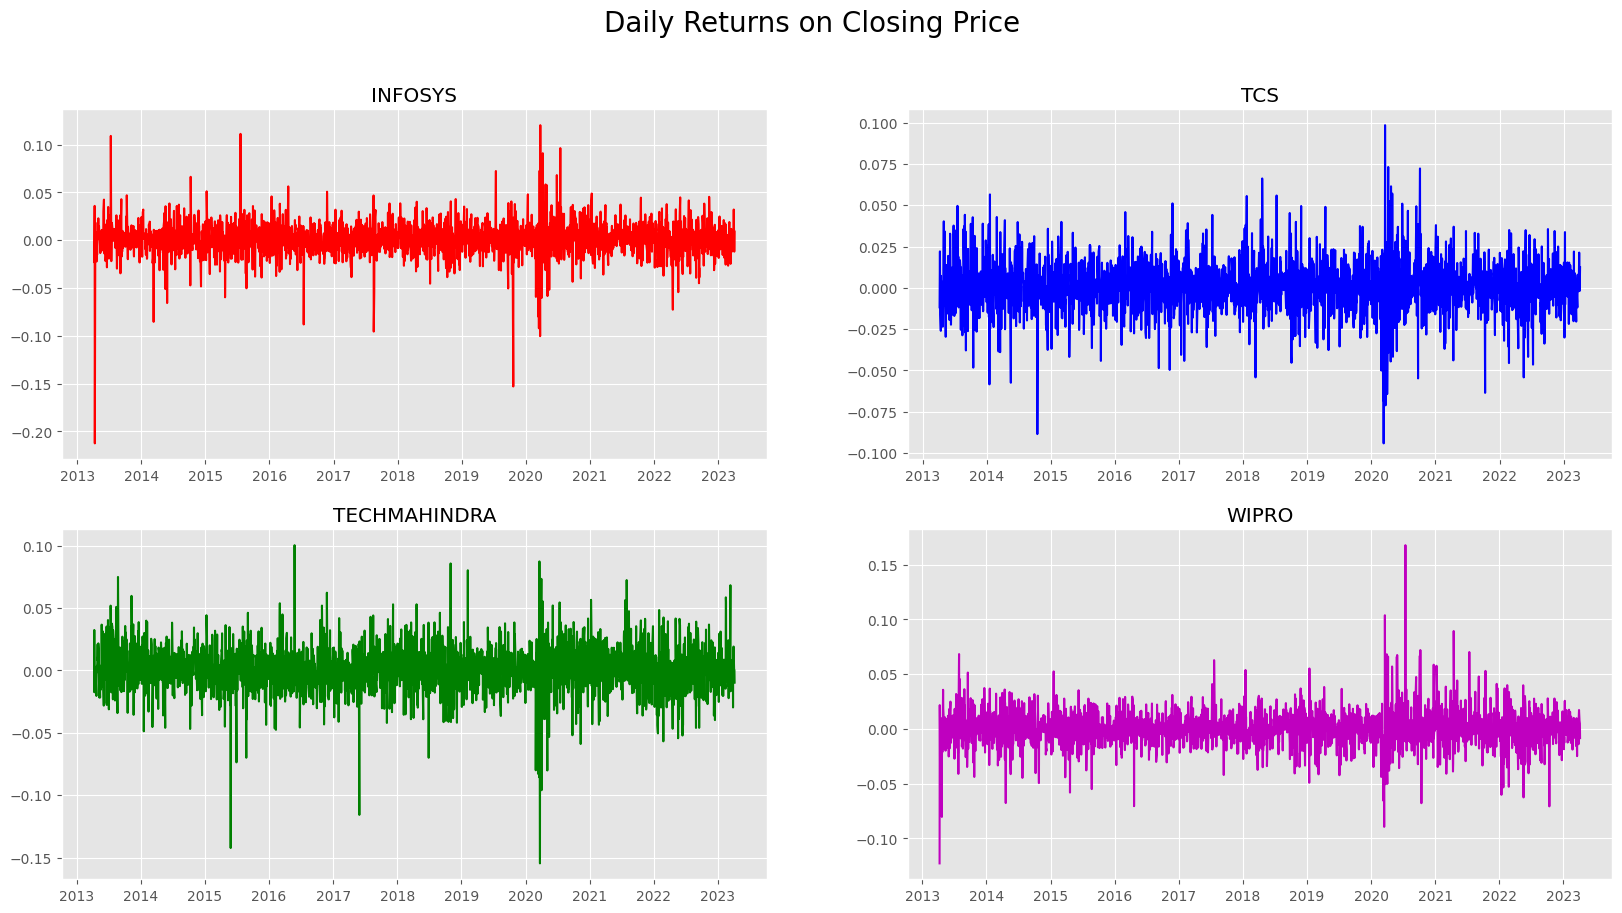

In [ ]:
i = 1
plt.figure(figsize=(20,10))
plt.suptitle('Daily Returns on Closing Price',size=20)
for cn in Company_name:
  df1 = copy.deepcopy(df.loc[df['Company_name']==cn])
  df1['daily_returns']= df1['Close'].pct_change()
  plt.subplot(2,2,i)
  plt.plot(df1['Date'],df1['daily_returns'],color[i-1])
  plt.title(f'{cn}')
  i=i+1

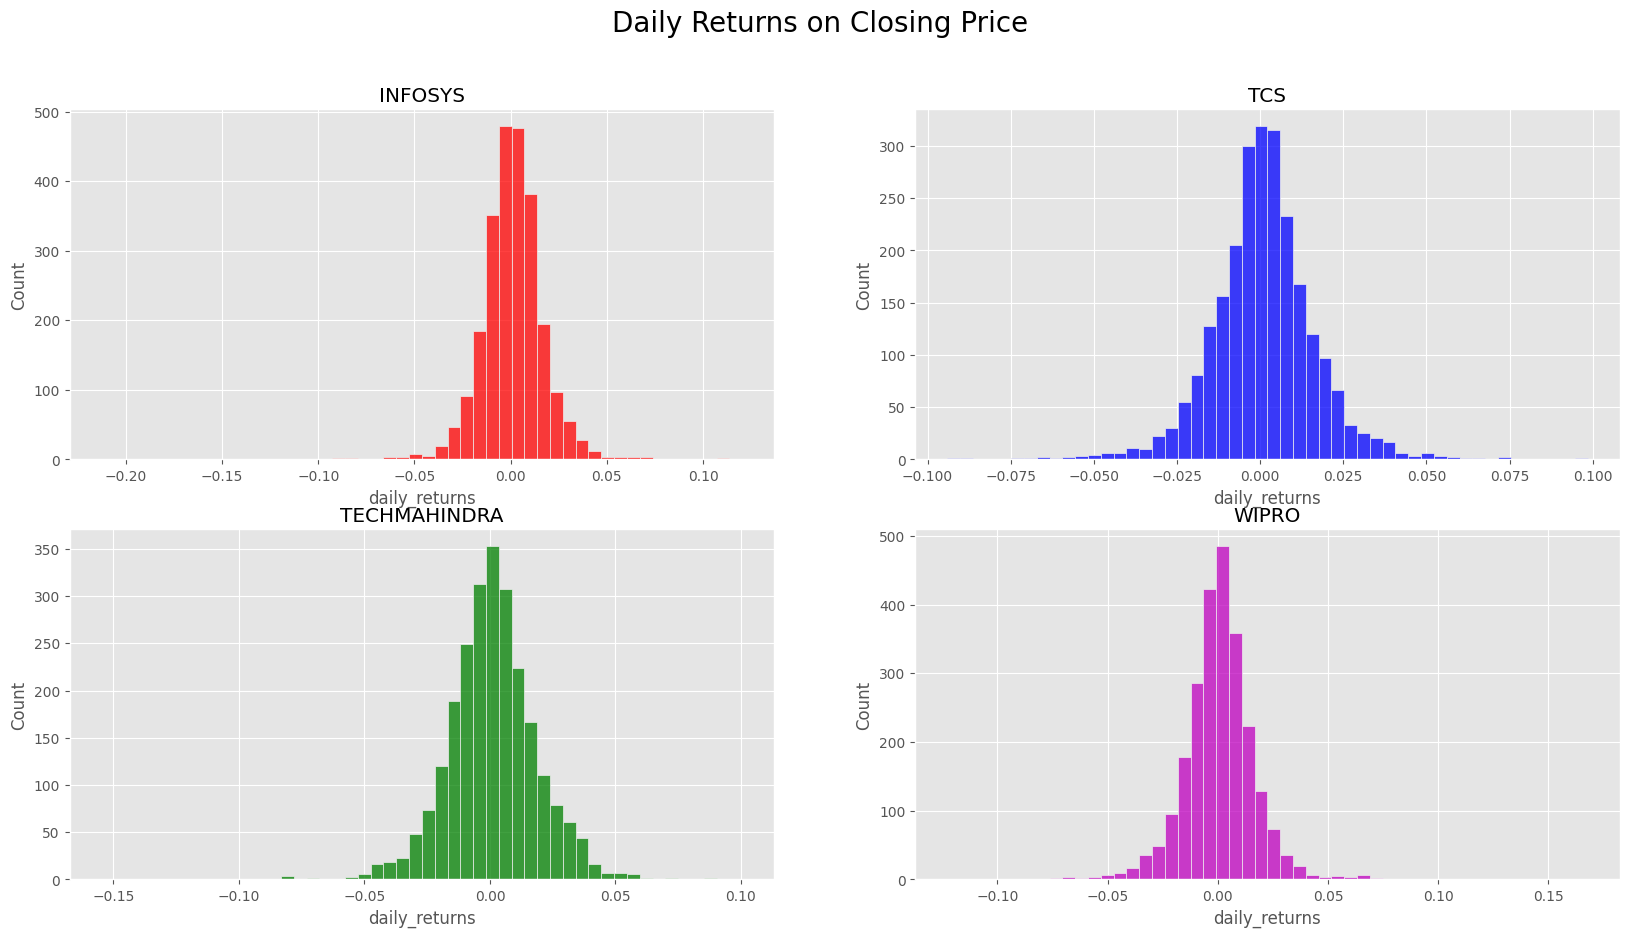

In [ ]:
i = 1
plt.figure(figsize=(20,10))
plt.suptitle('Daily Returns on Closing Price',size=20)
for cn in Company_name:
  df1 = copy.deepcopy(df.loc[df['Company_name']==cn])
  df1['daily_returns']= df1['Close'].pct_change()
  plt.subplot(2,2,i)
  sns.histplot(df1['daily_returns'],color = color[i-1],bins=50)
  plt.title(f'{cn}')
  i=i+1

**Conclusion**

From the above graphs, we have concluded that the order of daily return fluctuation is:

TCS > Tech Mahindra > Wipro > Infosys

For long-term investment, we select Infosys, and for short-term investment, we select TCS, but there is also risk involved

##**Volume of Daily Trading Stocks**
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

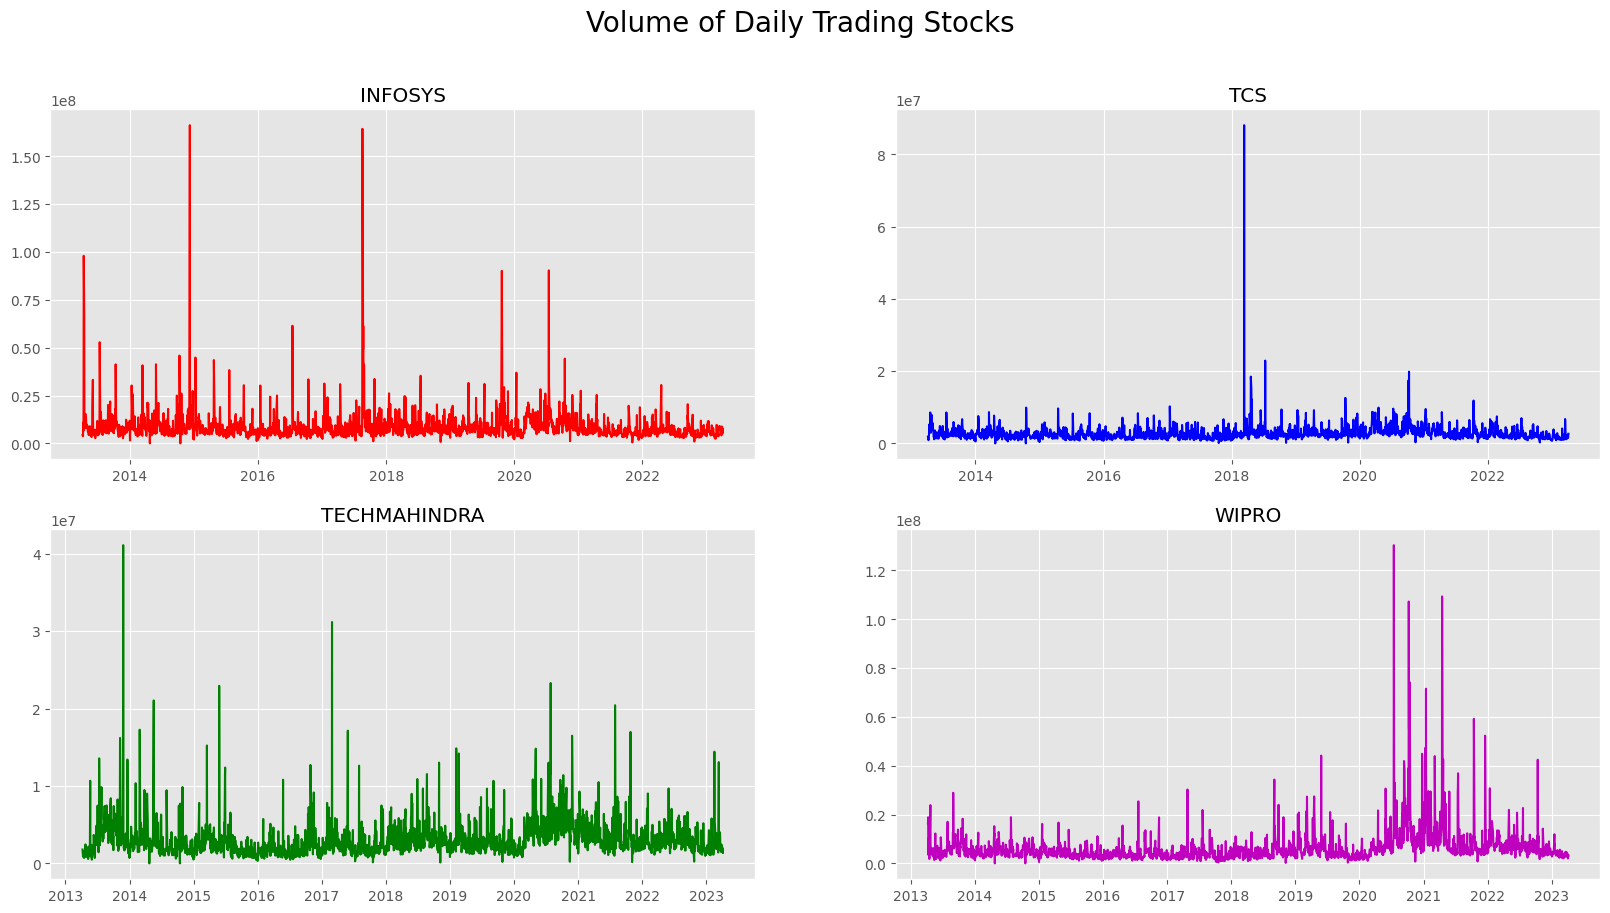

In [ ]:
i = 1
plt.figure(figsize=(20,10))
plt.suptitle('Volume of Daily Trading Stocks',size=20)
for cn in Company_name:
  df1 = df.loc[df['Company_name']==cn]
  plt.subplot(2,2,i)
  plt.plot(df1['Date'],df1['Volume'],color = color[i-1])
  plt.title(f'{cn}')
  i=i+1

**Conclusion**

From the above graphs, we have concluded that the order comanies as per volume of daily tarading stock is:

Infosys > Wipro > Tech Mahindra > TCS


##**Scatter plot between Daily Returns and Daily Trading Volume**

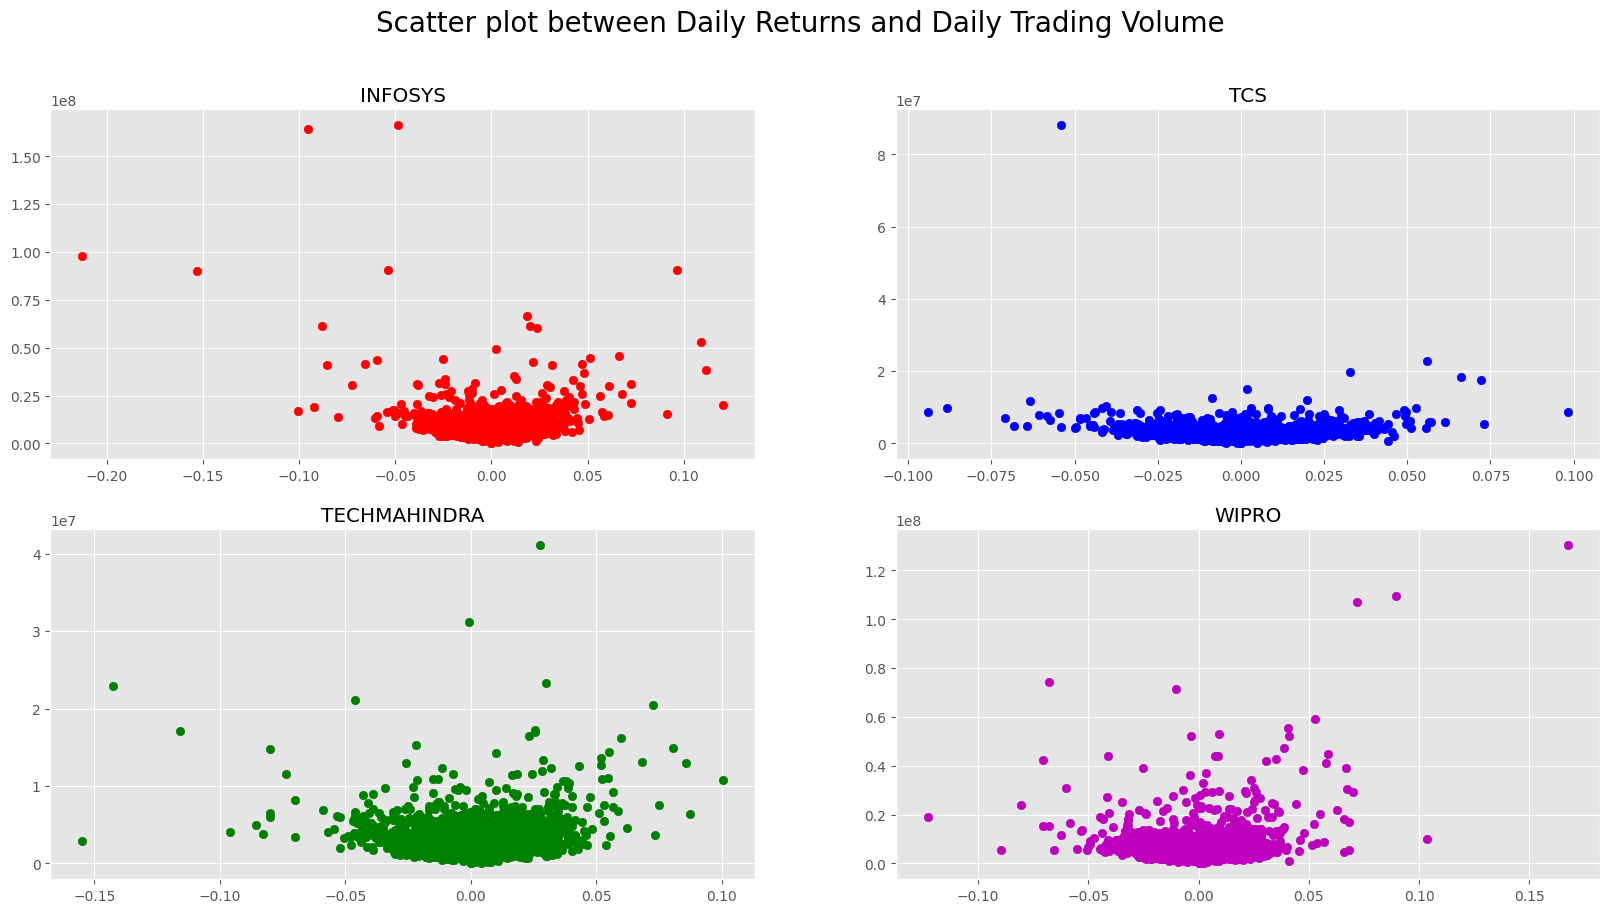

In [ ]:
i = 1
plt.figure(figsize=(20,10))
plt.suptitle("Scatter plot between Daily Returns and Daily Trading Volume",size=20)
for cn in Company_name:
  df1 = copy.deepcopy(df.loc[df['Company_name']==cn])
  df1['daily_returns']= df1['Close'].pct_change()
  plt.subplot(2,2,i)
  plt.scatter(df1['daily_returns'],df1['Volume'],color=color[i-1])
  #sns.scatterplot(df1,x='daily_returns',y= 'Volume',color = color[i-1])
  plt.title(f'{cn}')
  i=i+1

**Conclusion**

Daily return and daily trading volume are slightly inversely correlated.

##**Dividends on Stocks**

In [ ]:
df.loc[df['Dividends']!=0].groupby('Company_name')['Dividends'].count()

Company_name
INFOSYS         22
TCS             42
TECHMAHINDRA    15
WIPRO           15
Name: Dividends, dtype: int64

In [ ]:
df.loc[df['Dividends']!=0].groupby('Company_name')['Dividends'].max()

Company_name
INFOSYS         16.5
TCS             67.0
TECHMAHINDRA    18.0
WIPRO            5.0
Name: Dividends, dtype: float64

In [ ]:
df.loc[df['Dividends']!=0].groupby('Company_name')['Dividends'].min()

Company_name
INFOSYS         2.500
TCS             2.000
TECHMAHINDRA    1.250
WIPRO           0.375
Name: Dividends, dtype: float64

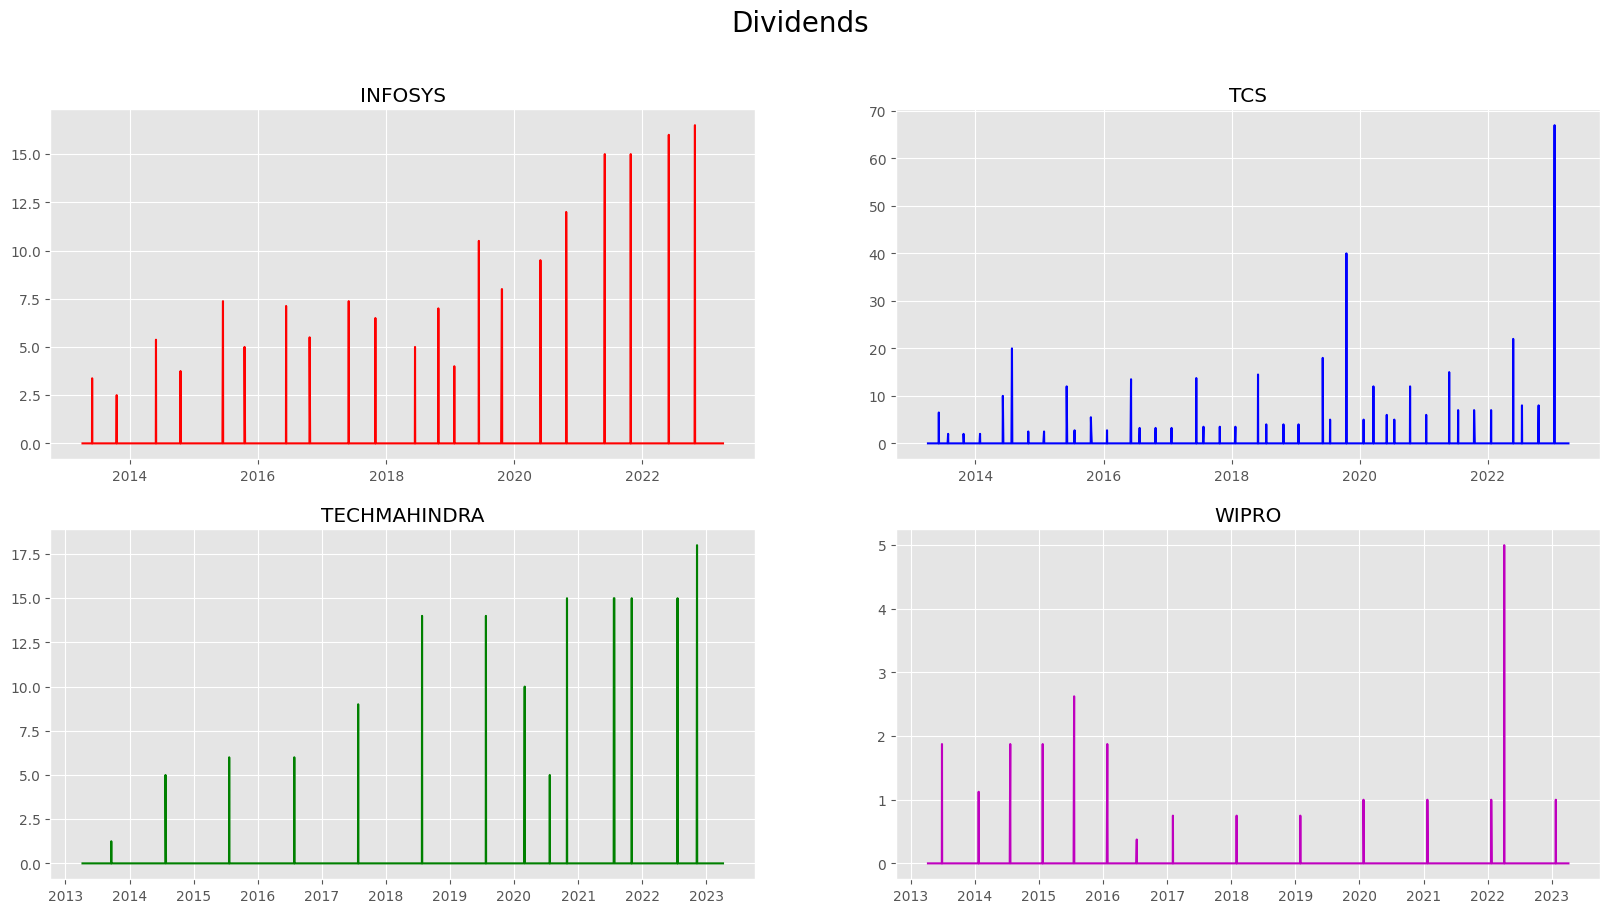

In [ ]:
i = 1
plt.figure(figsize=(20,10))
plt.suptitle('Dividends',size=20)
for cn in Company_name:
  df1 = df.loc[df['Company_name']==cn]
  plt.subplot(2,2,i)
  plt.plot(df1['Date'],df1['Dividends'],color = color[i-1])
  plt.title(f'{cn}')
  i=i+1

**Conclusion**

*  Over the last 10 years, TCS has given dividends to its shareholders 45 times, with maximum and minimum values of 67 and 2, respectively
*  Over the last 10 years, Infosys has given dividends to its shareholders 22 times, with maximum and minimum values of 16.5 and 2.5, respectively
*  Over the last 10 years, Tech Mahindra has given dividends to its shareholders 15 times, with maximum and minimum values of 18 and 1.25, respectively
*  Over the last 10 years, Wipro has given dividends to its shareholders 15 times,with maximum and minimum values of 5 and 0.375, respectively



##**Combined Plot of High, Low and Close Price of Stock**

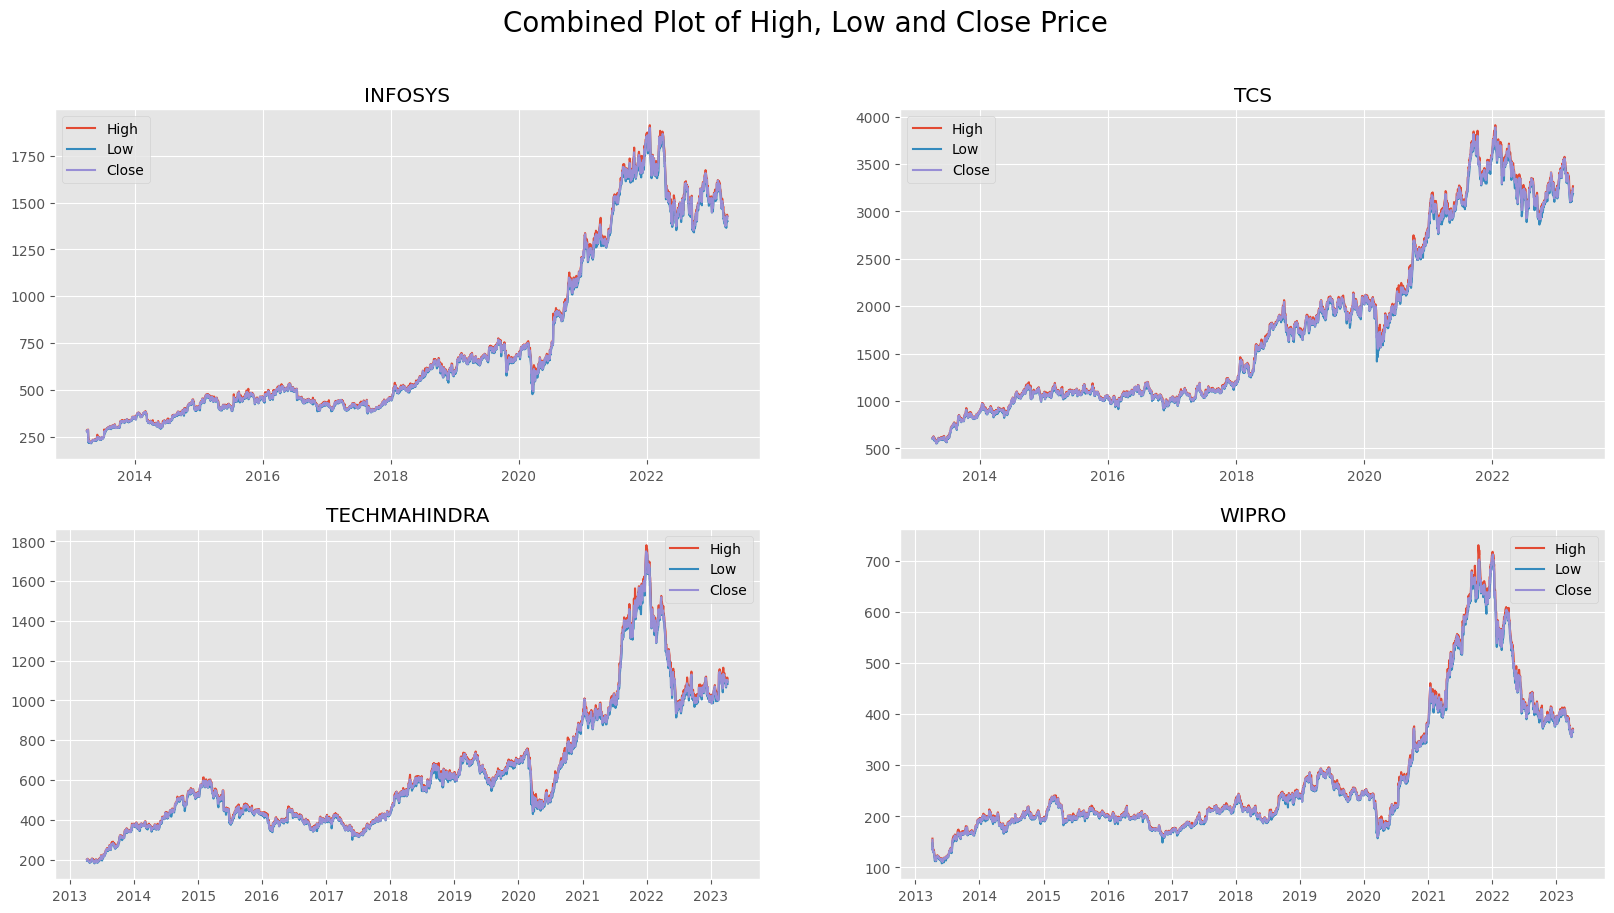

In [ ]:
i = 1
plt.figure(figsize=(20,10))
plt.suptitle('Combined Plot of High, Low and Close Price',size=20)
for cn in Company_name:
  df1 = df.loc[df['Company_name']==cn]
  plt.subplot(2,2,i)
  plt.plot(df1['Date'],df1[['High','Low','Close']])
  plt.legend(['High','Low','Close'])
  plt.title(f'{cn}')
  i=i+1

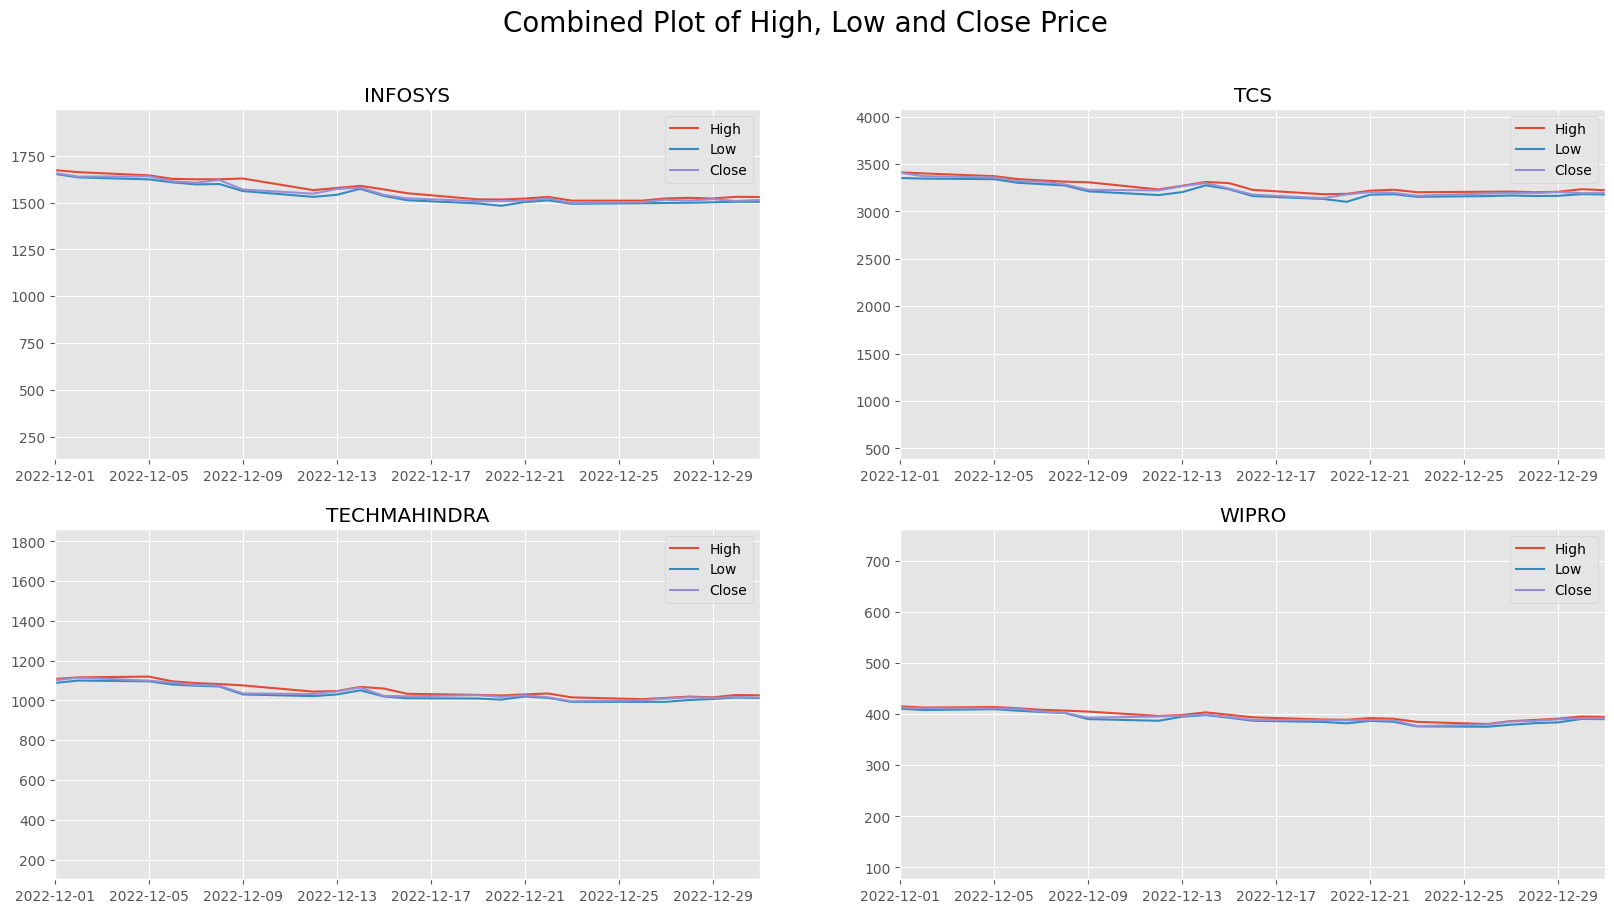

In [ ]:
i = 1
plt.figure(figsize=(20,10))
plt.suptitle('Combined Plot of High, Low and Close Price',size=20)
for cn in Company_name:
  df1 = df.loc[df['Company_name']==cn]
  plt.subplot(2,2,i)
  plt.plot(df1['Date'],df1[['High','Low','Close']])
  plt.xlim([datetime(2022,12,1),datetime(2022,12,31)])
  plt.legend(['High','Low','Close'])
  plt.title(f'{cn}')
  i=i+1

**Conclusion**

From the above sample, we have concluded that the closing value is typically between the high and low values of the day

##**Moving Averages**
The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.


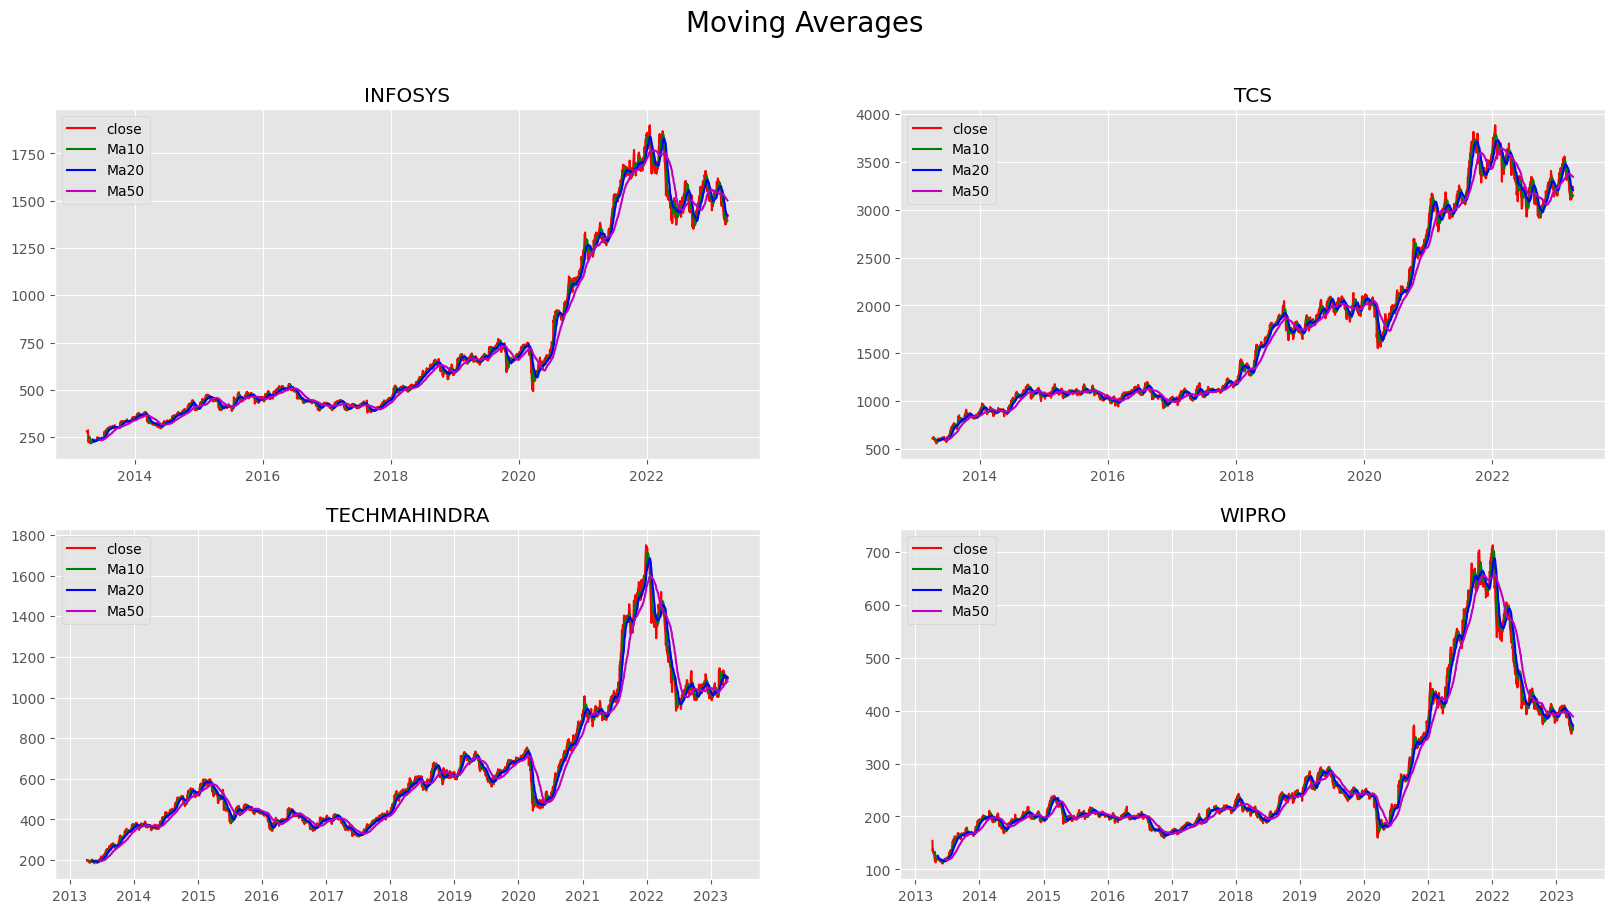

In [ ]:
i = 1
plt.figure(figsize=(20,10))
plt.suptitle('Moving Averages',size=20)
for cn in Company_name:
  df1 = copy.deepcopy(df.loc[df['Company_name']==cn])
  df1['ma10'] = df1['Close'].rolling(window=10).mean()
  df1['ma20'] = df1['Close'].rolling(window=20).mean()
  df1['ma50'] = df1['Close'].rolling(window=50).mean()
  plt.subplot(2,2,i)
  plt.plot(df1['Date'],df1[['Close']],'r')
  plt.plot(df1['Date'],df1[['ma10']],'g')
  plt.plot(df1['Date'],df1[['ma20']],'b')
  plt.plot(df1['Date'],df1[['ma50']],'m')
  plt.legend(['close','Ma10','Ma20','Ma50'])
  plt.title(f'{cn}')
  i=i+1

**Conclusion**

The above moving average smoothing of the time series reveals its original trend without noise.

In [ ]:
df_new = df.set_index('Date',drop=True)

In [ ]:
df_new.head()

Open        High         Low       Close    Volume  \
Date                                                                   
2013-04-05  282.877867  284.842979  280.028455  281.585815   4372960   
2013-04-08  280.028374  282.352109  277.793060  278.249939   3716360   
2013-04-09  278.412096  278.942667  270.816935  271.809326  10840656   
2013-04-10  275.410366  277.847109  272.782030  276.653290   6551616   
2013-04-11  281.649546  288.439015  278.544661  286.581970  17018672   

            Dividends  Stock Splits Company_name  
Date                                              
2013-04-05        0.0           0.0      INFOSYS  
2013-04-08        0.0           0.0      INFOSYS  
2013-04-09        0.0           0.0      INFOSYS  
2013-04-10        0.0           0.0      INFOSYS  
2013-04-11        0.0           0.0      INFOSYS

##**Yearly Maximum Stock Price**

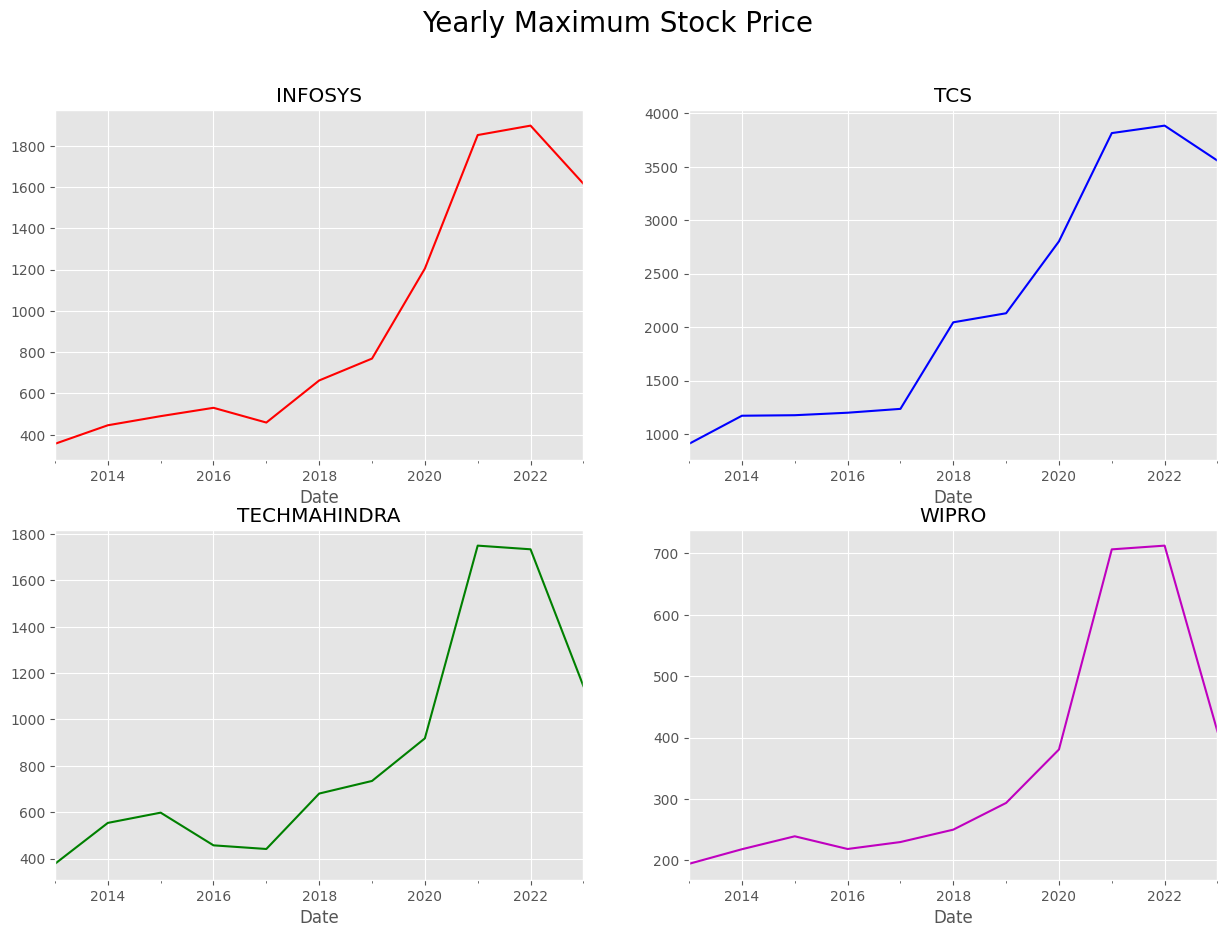

In [ ]:
i = 1
plt.figure(figsize=(15,10))
plt.suptitle('Yearly Maximum Stock Price',size=20)
for cn in Company_name:
  df1 = df.loc[df['Company_name']==cn]
  df1 = df1.set_index('Date',drop=True)
  plt.subplot(2,2,i)
  df1.resample(rule='A').max()['Close'].plot(color=color[i-1])
  plt.title(f'{cn}')
  i=i+1


**Conclusion**

Based on the above graphs, we have concluded that each company except Tech Mahindra experienced a maximum value of stock in the year 2022 and Tech mahindra maximum value of stock in the year 2021.

##**Yearly Minimum Stock Price**

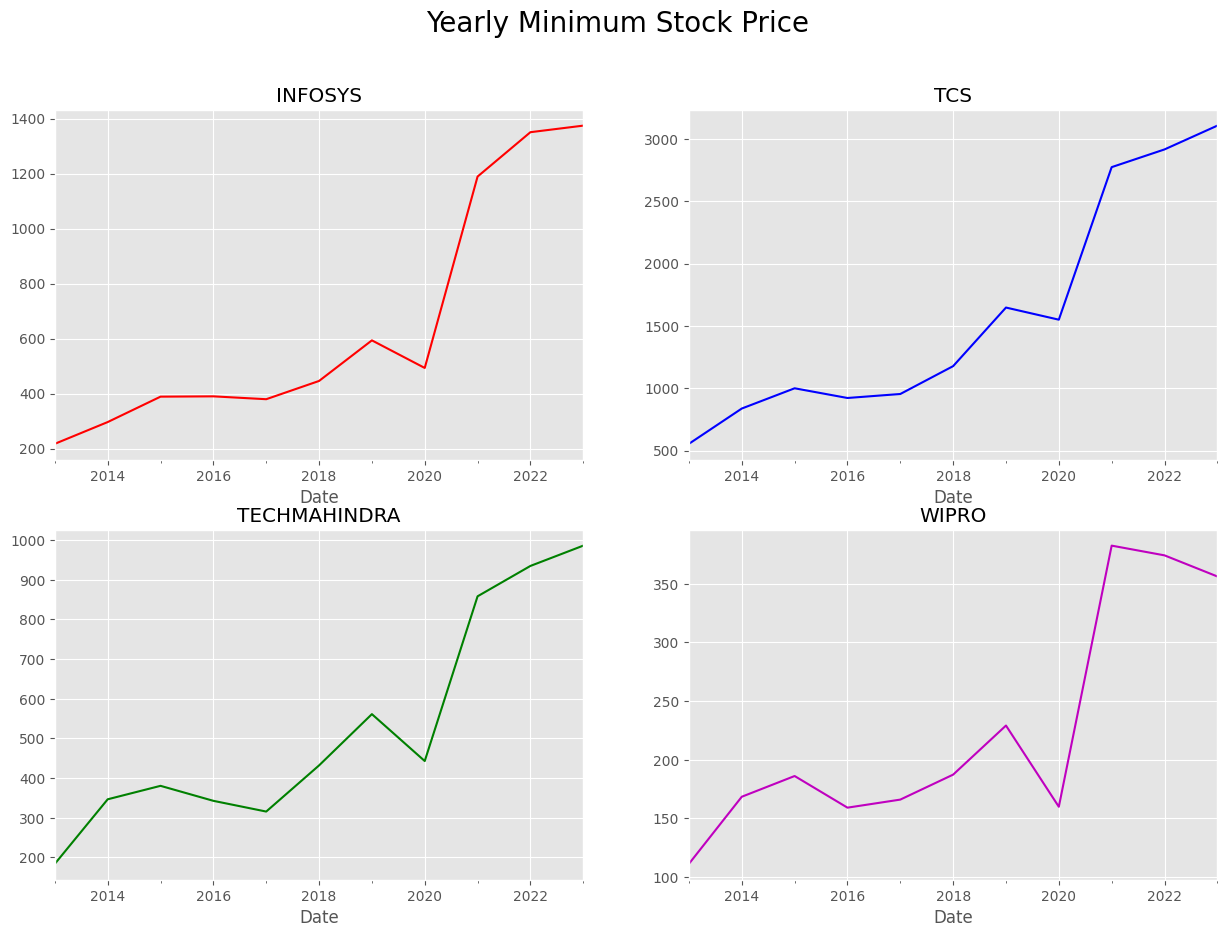

In [ ]:
i = 1
plt.figure(figsize=(15,10))
plt.suptitle('Yearly Minimum Stock Price',size=20)
for cn in Company_name:
  df1 = df.loc[df['Company_name']==cn]
  df1 = df1.set_index('Date',drop=True)
  plt.subplot(2,2,i)
  df1.resample(rule='A').min()['Close'].plot(color=color[i-1])
  plt.title(f'{cn}')
  i=i+1

**Conclusion**

Based on the above graphs, we have concluded that each company experienced a minimum curve fall in the year 2020, likely due to the COVID-19 virus. Furthermore, Tech Mahindra and Wipro experienced additional minimum curve falls in the years 2017 and 2016, respectively

##**Quarterly Maximum Stock Price**

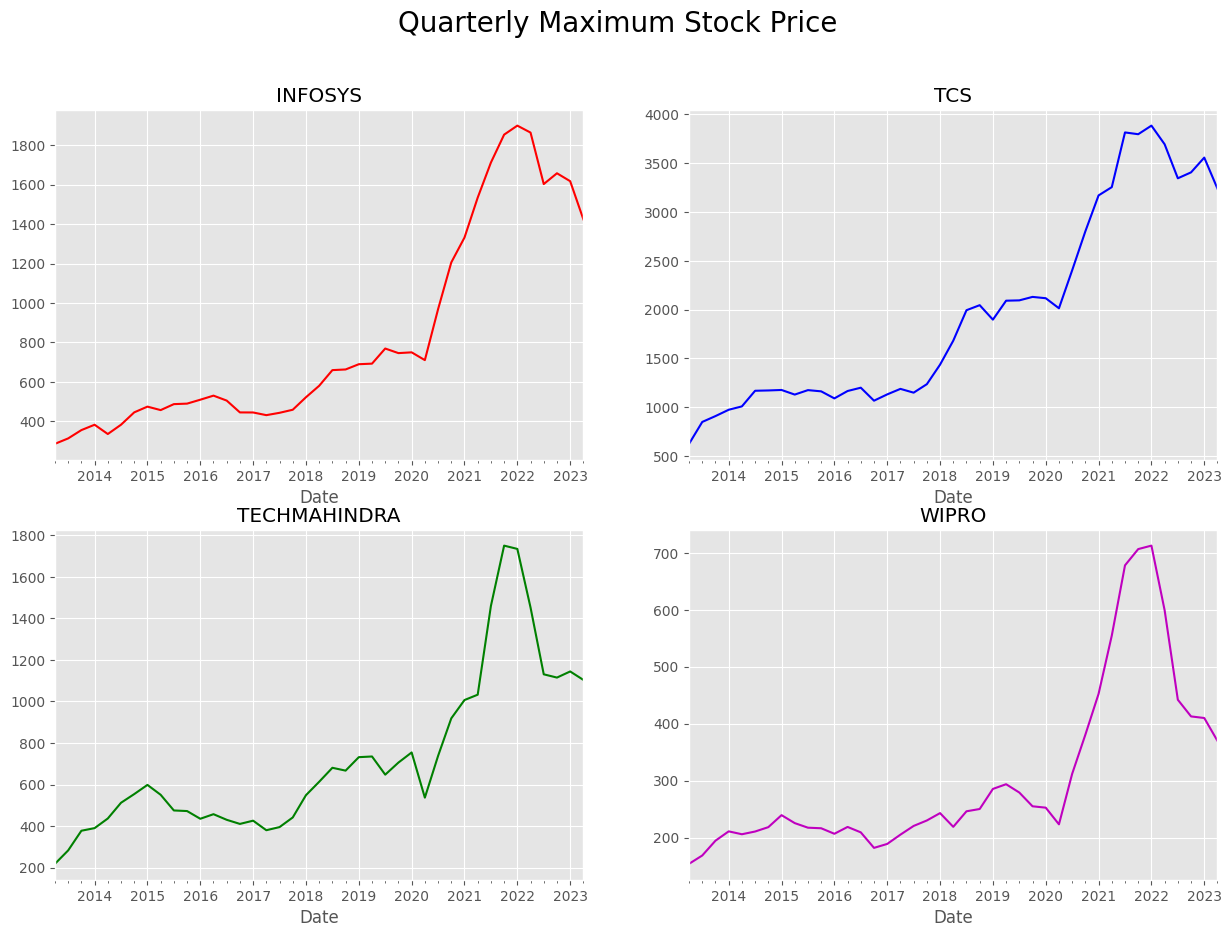

In [ ]:
i = 1
plt.figure(figsize=(15,10))
plt.suptitle('Quarterly Maximum Stock Price',size=20)
for cn in Company_name:
  df1 = df.loc[df['Company_name']==cn]
  df1 = df1.set_index('Date',drop=True)
  plt.subplot(2,2,i)
  df1.resample(rule='QS').max()['Close'].plot(color=color[i-1])
  plt.title(f'{cn}')
  i=i+1

##**Quarterly Minimum Stock Price**

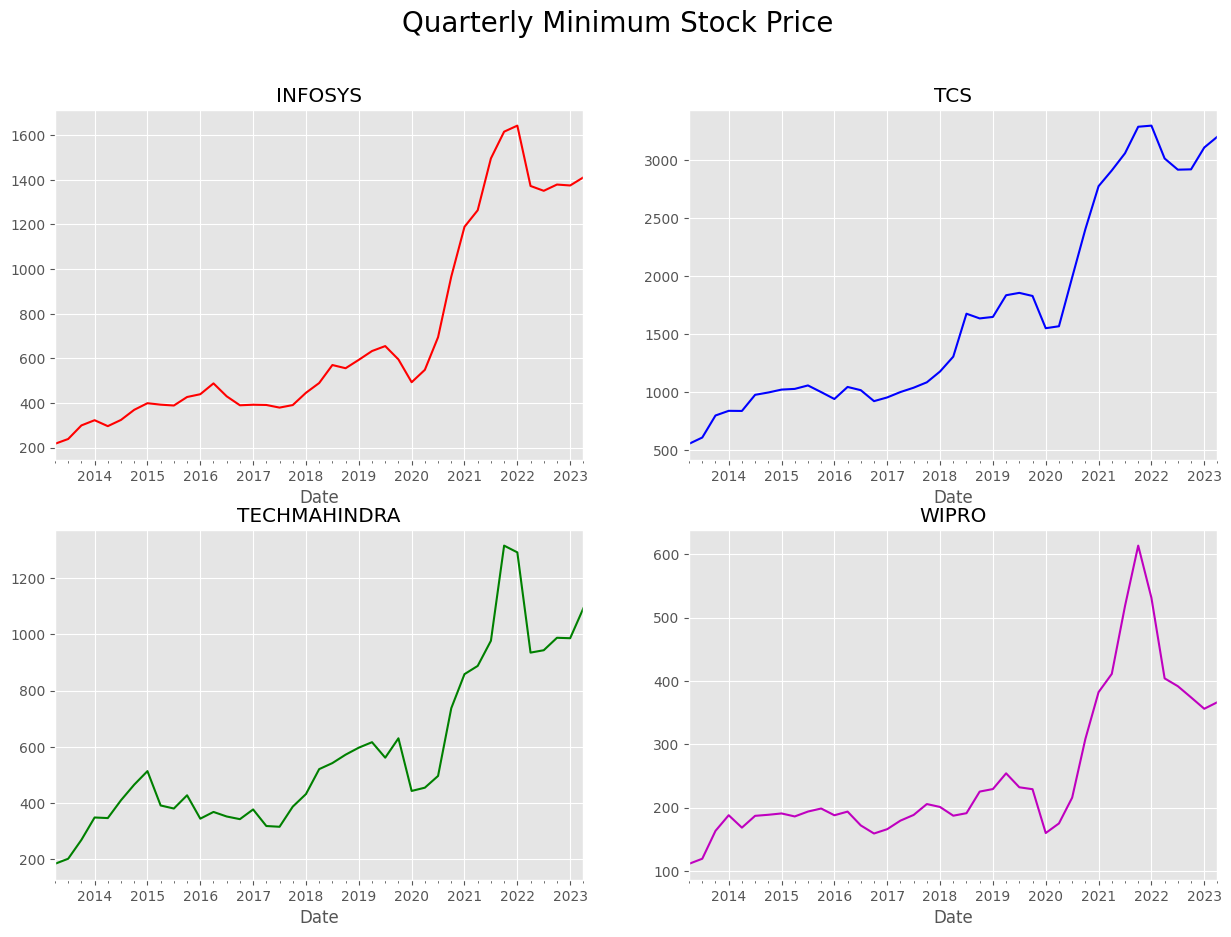

In [ ]:
i = 1
plt.figure(figsize=(15,10))
plt.suptitle('Quarterly Minimum Stock Price',size=20)
for cn in Company_name:
  df1 = df.loc[df['Company_name']==cn]
  df1 = df1.set_index('Date',drop=True)
  plt.subplot(2,2,i)
  df1.resample(rule='QS').min()['Close'].plot(color=color[i-1])
  plt.title(f'{cn}')
  i=i+1

##**Yearly Average Stock Price**

<ipython-input-43-1ff1ff4e4f1b>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.resample(rule='BA').mean()['Close'].plot(kind='bar',color=color[i-1])
<ipython-input-43-1ff1ff4e4f1b>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.resample(rule='BA').mean()['Close'].plot(kind='bar',color=color[i-1])
<ipython-input-43-1ff1ff4e4f1b>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.resample(rule='BA').mean()

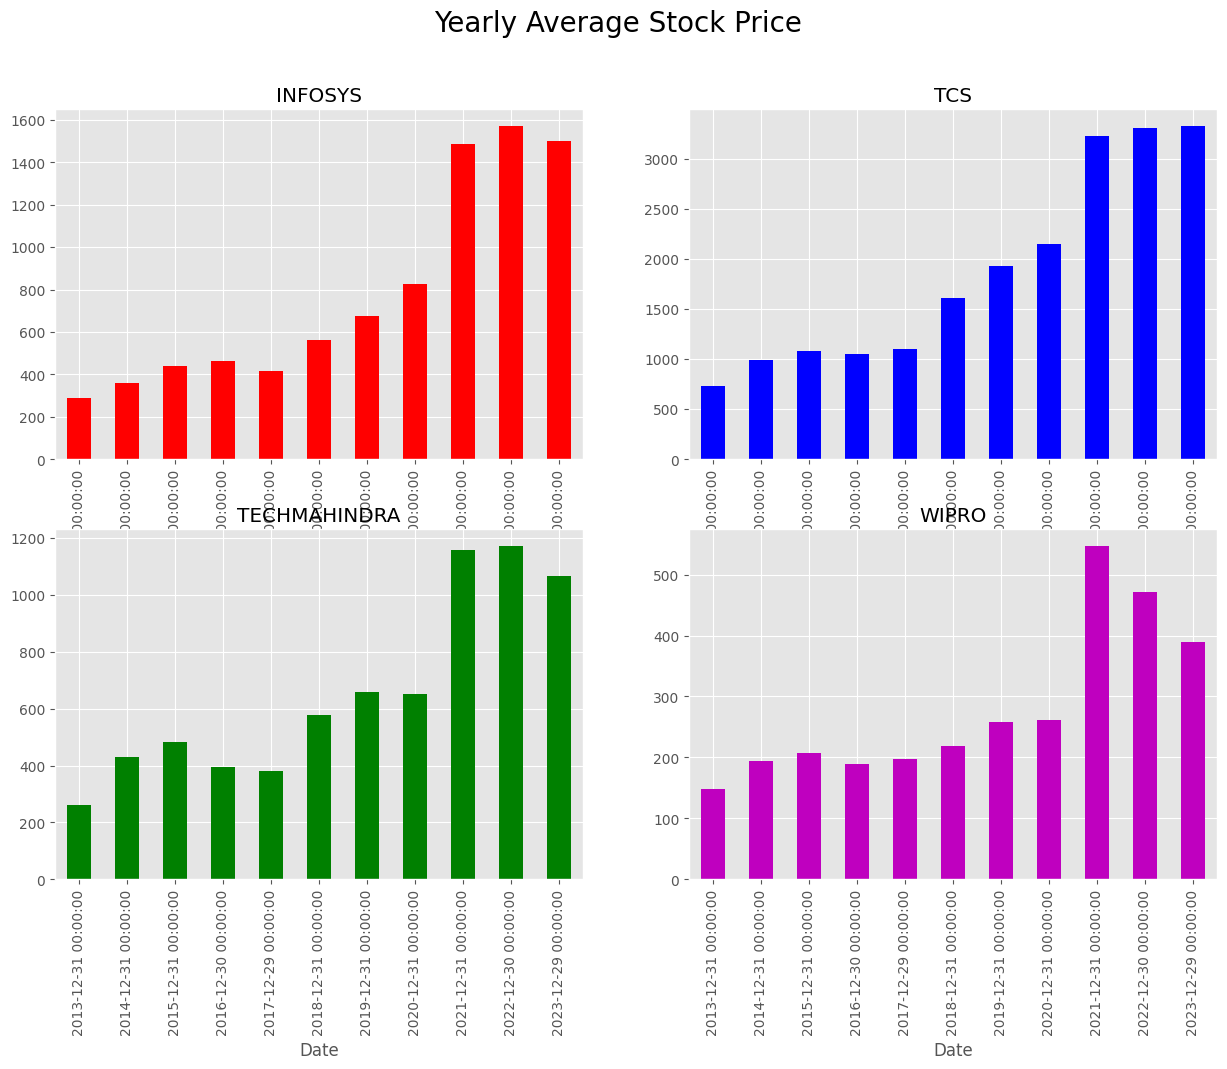

In [ ]:
i = 1
plt.figure(figsize=(15,10))
plt.suptitle('Yearly Average Stock Price',size=20)
for cn in Company_name:
  df1 = copy.deepcopy(df.loc[df['Company_name']==cn])
  df1 = df1.set_index('Date',drop=True)
  plt.subplot(2,2,i)
  df1.resample(rule='BA').mean()['Close'].plot(kind='bar',color=color[i-1])
  plt.title(f'{cn}')
  i=i+1

**Conclusion**

As seen from the comparison to the last three years, the average stock price of TCS has increased in the current year, while others have decreased. Additionally, Wipro's average share price has continuously decreased over the last three years..





##**Quarterly Average Stock Price**

<ipython-input-44-bb1beeed1611>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.resample(rule='QS').mean()['Close'].plot(kind='bar',color=color[i-1])
<ipython-input-44-bb1beeed1611>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.resample(rule='QS').mean()['Close'].plot(kind='bar',color=color[i-1])
<ipython-input-44-bb1beeed1611>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.resample(rule='QS').mean()

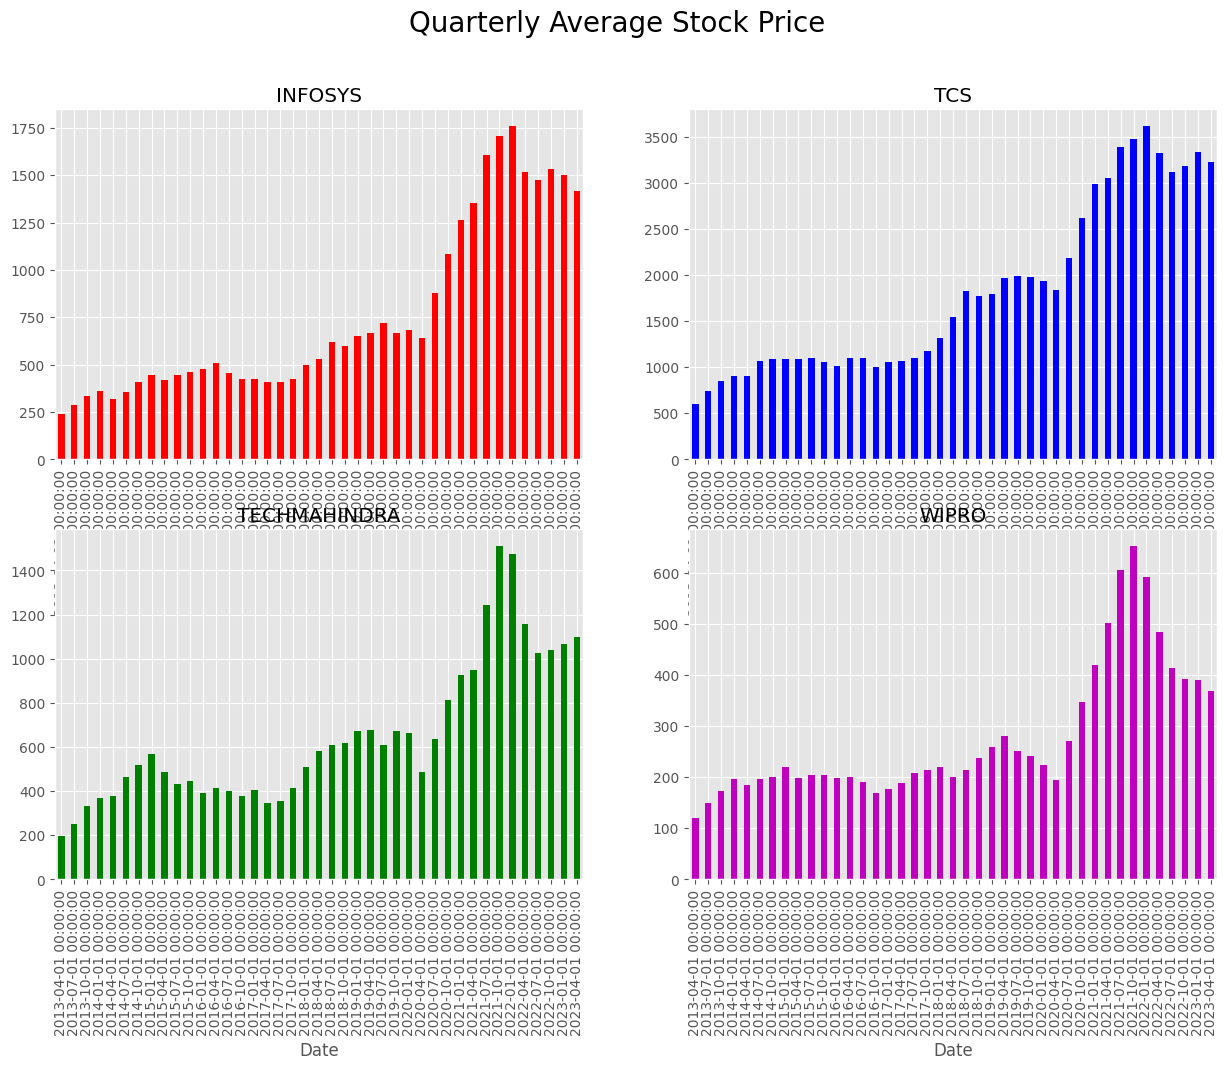

In [ ]:
i = 1
plt.figure(figsize=(15,10))
plt.suptitle('Quarterly Average Stock Price',size=20)
for cn in Company_name:
  df1 = df.loc[df['Company_name']==cn]
  df1=df1.set_index('Date',drop=True)
  plt.subplot(2,2,i)
  df1.resample(rule='QS').mean()['Close'].plot(kind='bar',color=color[i-1])
  plt.title(f'{cn}')
  i=i+1

#**EDA - Bivariate Analysis**
**Correlation Between Different Closing Stock Prices**

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame

df_closing=df.pivot(index='Date', columns='Company_name', values='Close')
df_closing.head()

Company_name     INFOSYS         TCS  TECHMAHINDRA       WIPRO
Date                                                          
2013-04-05    281.585815  607.236877           NaN         NaN
2013-04-08    278.249939  600.104004    198.869400  153.833923
2013-04-09    271.809326  606.851746    195.473877  134.947449
2013-04-10    276.653290  620.246155    201.820221  137.878113
2013-04-11    286.581970  622.859863    201.446335  138.118057

In [ ]:
df_closing=df_closing.dropna()
df_closing.head(10)

Company_name     INFOSYS         TCS  TECHMAHINDRA       WIPRO
Date                                                          
2013-04-08    278.249939  600.104004    198.869400  153.833923
2013-04-09    271.809326  606.851746    195.473877  134.947449
2013-04-10    276.653290  620.246155    201.820221  137.878113
2013-04-11    286.581970  622.859863    201.446335  138.118057
2013-04-12    225.658661  612.667419    198.071030  131.554062
2013-04-15    229.824707  596.740295    196.039780  129.943054
2013-04-16    225.619415  601.076538    196.585495  130.714279
2013-04-17    224.401016  590.337158    193.058655  128.383484
2013-04-18    225.565323  588.756470    192.068283  126.498260
2013-04-22    220.539566  577.631897    188.147293  116.335205

In [ ]:
df_closing.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2465 entries, 2013-04-08 to 2023-04-05
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   INFOSYS       2465 non-null   float64
 1   TCS           2465 non-null   float64
 2   TECHMAHINDRA  2465 non-null   float64
 3   WIPRO         2465 non-null   float64
dtypes: float64(4)
memory usage: 96.3 KB


In [ ]:
# Make a new tech returns DataFrame
tech_rets =df_closing.pct_change()
tech_rets=tech_rets.iloc[1:]
tech_rets.head()

Company_name   INFOSYS       TCS  TECHMAHINDRA     WIPRO
Date                                                    
2013-04-09   -0.023147  0.011244     -0.017074 -0.122772
2013-04-10    0.017821  0.022072      0.032466  0.021717
2013-04-11    0.035889  0.004214     -0.001853  0.001740
2013-04-12   -0.212586 -0.016364     -0.016755 -0.047525
2013-04-15    0.018462 -0.025996     -0.010255 -0.012246

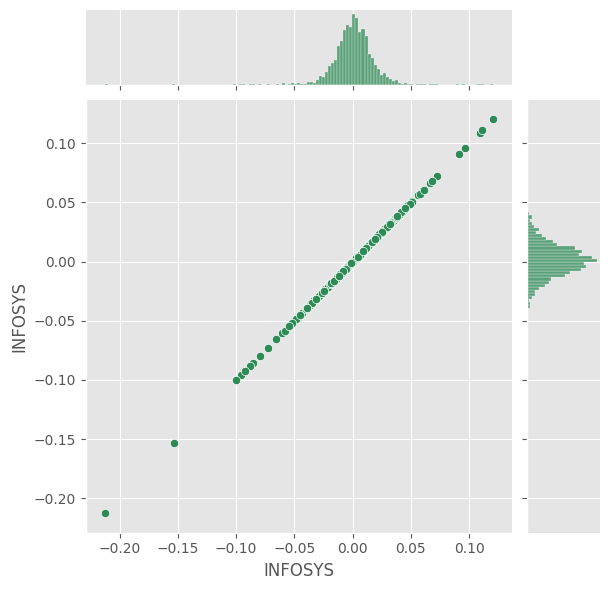

In [ ]:
# Comparing Infosys to itself should show a perfectly linear relationship
sns.jointplot(x='INFOSYS', y='INFOSYS', data=tech_rets, kind='scatter', color='seagreen')

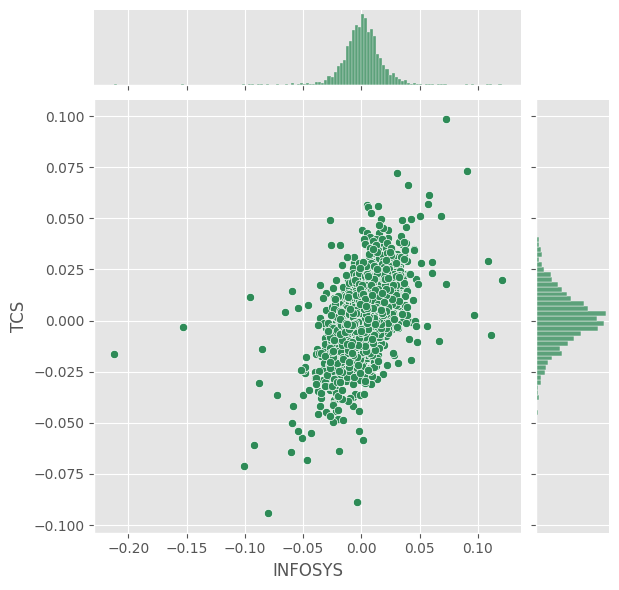

In [ ]:
# We'll use joinplot to compare the daily returns of Infosys and Tcs
sns.jointplot(x='INFOSYS', y='TCS', data=tech_rets, kind='scatter', color='seagreen')

**Conclusion**

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

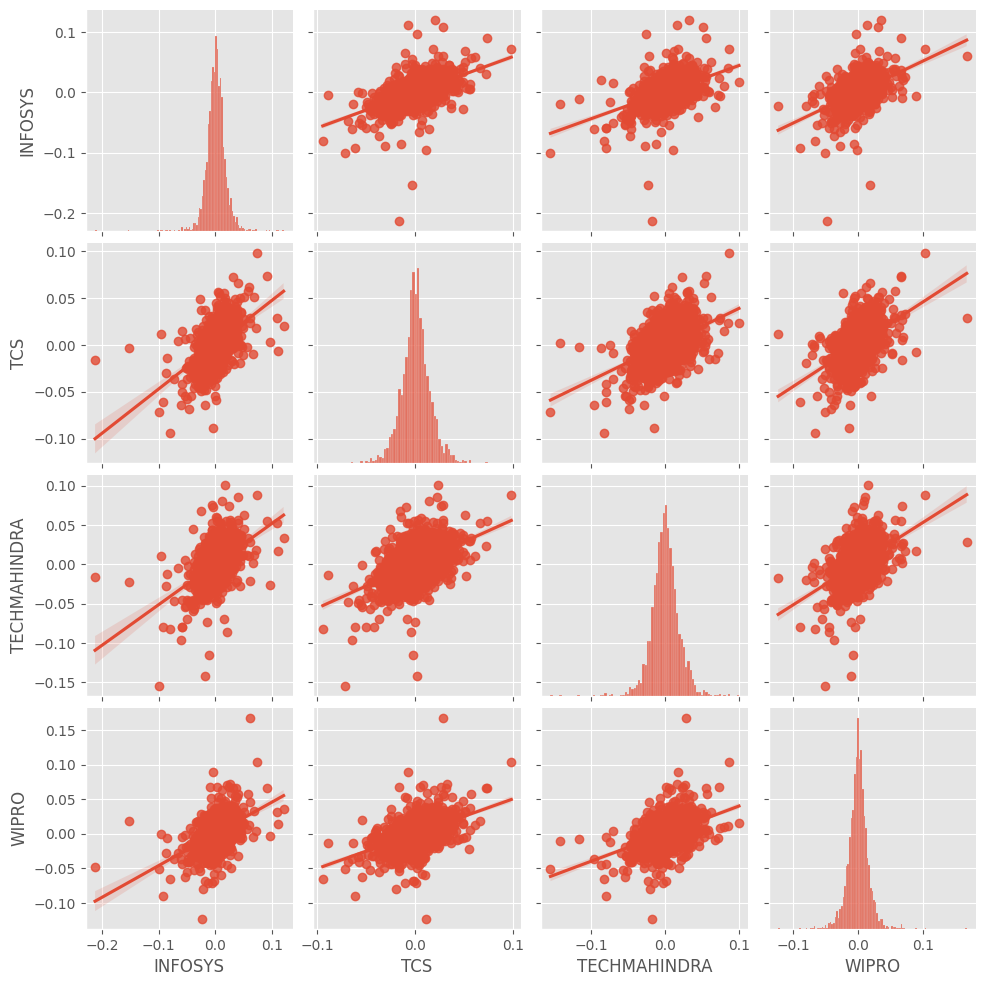

In [ ]:
sns.pairplot(tech_rets, kind='reg')

**Conclusion**

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Infosys and TCS returns. It might be interesting to investigate that individual comaprison.

While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

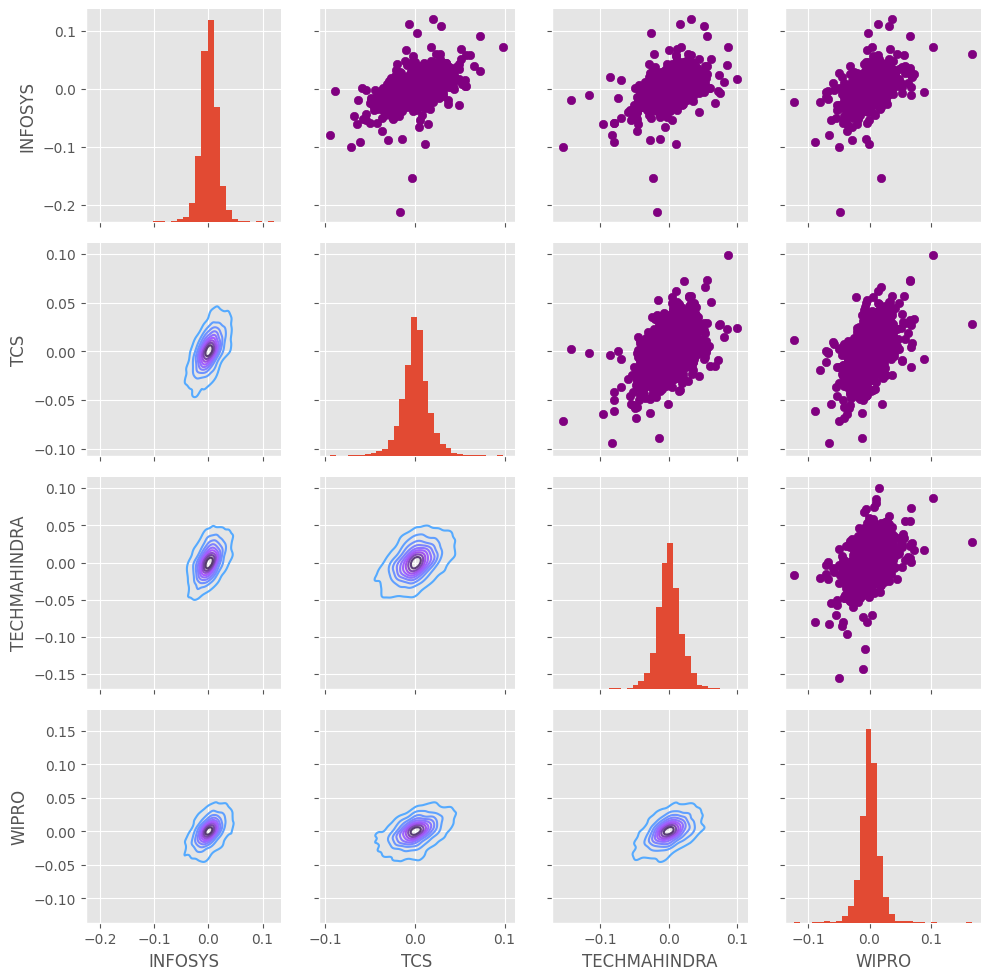

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets)

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

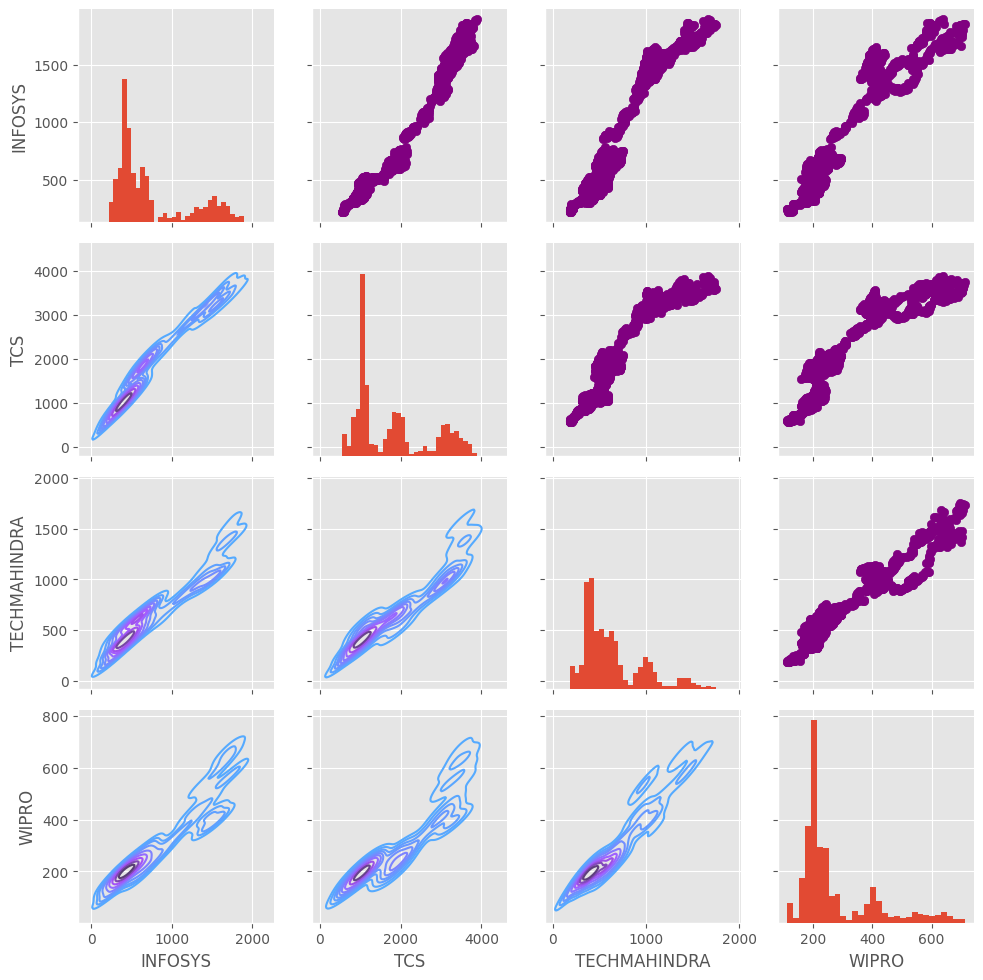

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(df_closing)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

**Conclusion**

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Infosys and TCS.

Text(0.5, 1.0, 'Correlation of stock closing price')

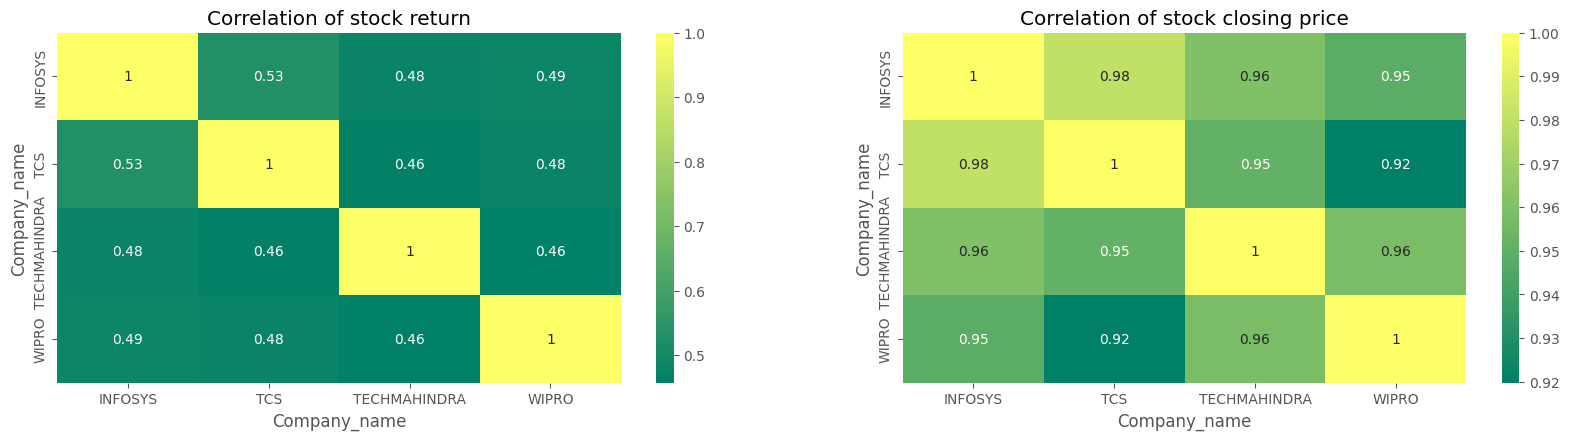

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(df_closing.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

**Conclusion**

Just like we suspected in our PairPlot we see here numerically and visually that Infosys and TCS had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

#**Forecasting**
#Infosys stock


In [ ]:
df1 = df.loc[df['Company_name']=='INFOSYS']
df_raw = pd.DataFrame(df1)
df_raw.Date = pd.to_datetime(df.Date,yearfirst=True)
df_raw.set_index('Date',inplace=True)
df1 = df_raw.asfreq('b','ffill')

##Time series decomposition
The decomposition of a time series involves breaking down the time series data into its constituent components, which are typically the trend, seasonal, and residual components. The trend component represents the long-term pattern or trend in the data, the seasonal component captures the repeating patterns that occur within a specific time frame (e.g., daily, monthly, yearly), and the residual component represents the random fluctuations or noise that cannot be explained by the trend and seasonal components.

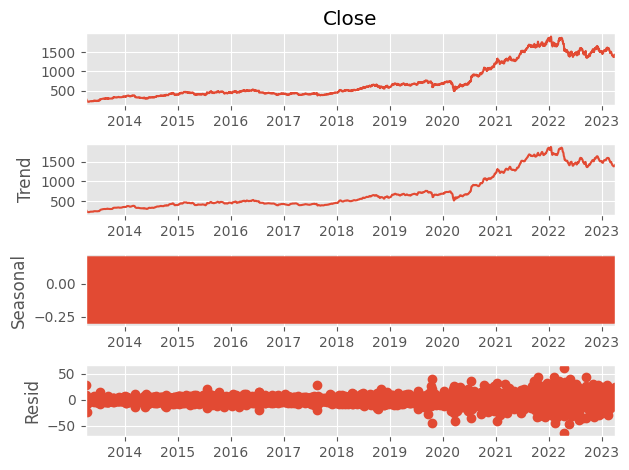

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(df1['Close'],model='additive')
decompose_result.plot();

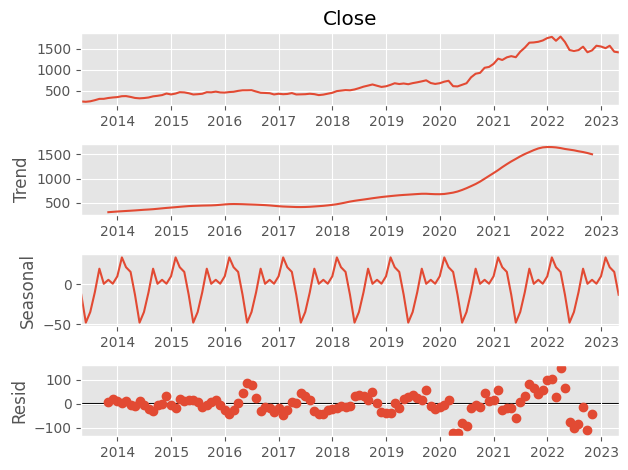

In [ ]:
data = df1.Close.resample('M').mean()
decompose_result = seasonal_decompose(data,model='additive')
decompose_result.plot();

##Stationarity of time series

The ADF test is a useful tool in time series analysis to check the stationarity of data before applying further statistical techniques or modeling approaches that assume stationarity, such as ARIMA, SARIMA, or other advanced time series models.

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adf_test(df.loc[df['Company_name']=='INFOSYS']['Close'])

ADF Statistics: -0.441115082444799
p- value: 0.9030044049323382
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


**Conclusion**

Since our series is not stationary, we need to make it stationary before conducting further analysis.

To make them stationary, we can apply differencing methods.

Differencing is a common technique used to make a time series data stationary. It involves taking the difference between consecutive observations in the time series data.


In [ ]:
df1 = copy.deepcopy(df.loc[df['Company_name']=='INFOSYS'])
df1['fisrt_differencing'] = df1['Close'] - df1['Close'].shift(1)
adf_test(df1['fisrt_differencing'].dropna())

ADF Statistics: -10.428922072308648
p- value: 1.6299450269823537e-18
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


Given series is stationary after one differencing.

##Check correlation



In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

Autocorrelation

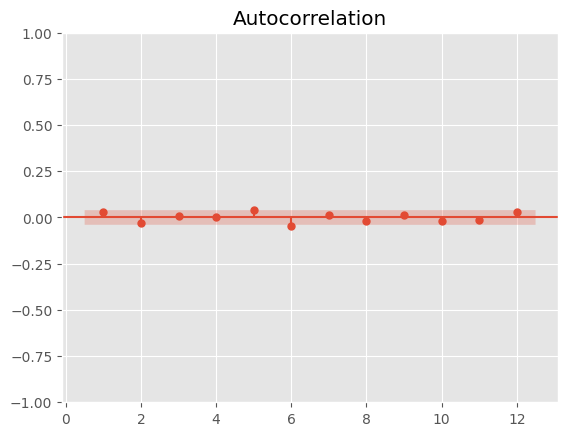

In [ ]:
plot_acf(df1['fisrt_differencing'].dropna(),zero=False,lags=12);

Partial autocorreltion

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


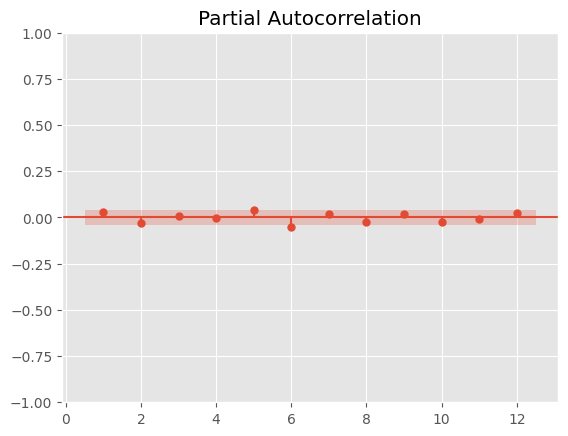

In [ ]:
plot_pacf(df1['fisrt_differencing'].dropna(),zero=False,lags=12);

**Conclusion**

If the stock data for Infosys is determined to be non-stationary, meaning it does not exhibit constant mean and variance over time, but becomes stationary after first differencing, and it also has no autocorrelation and partial autocorrelation, then it may exhibit characteristics of a random walk. In such cases, using base models for prediction, which are simple models relying on historical data or simple statistical methods such as naive forecast or moving average, could be considered.

#**One month forecosting**

As we have observed that df1['first_differencing'] is stationary and does not show any significant correlation in the ACF and PACF plots, it suggests that it follows a random walk pattern. Therefore, df1['Close'] is also likely to exhibit a random walk behavior.
therefore we need to predict future stock values using naive models.
But we can try with different algorithms and see what will happen.

**Infosys**
1. Expoenetial Smoothing
2. Moving Average Model
3. Autoregression Model
4. ARIMA
5. SARIMA
6. SARIMAX
7. Prophet
8. LSTM
9. GRU

Prepare data for forecasting by filling missing date other than saturday and sunday.

In [ ]:
df1=df.loc[df['Company_name']=='INFOSYS']
df1.set_index('Date',inplace = True)
df1 = df1.asfreq('b','ffill')
train = df1.loc[:'2023-02-28']['Close']
test = df1.loc['2023-03-01':]['Close']

##Simple Exponential Smoothing
Simple exponential smoothing (SES) is a basic form of exponential smoothing, which is a time series forecasting method. It assigns exponentially decreasing weights to past observations, with a single smoothing parameter (often denoted as α) that controls the rate of decay of the weights. SES is typically used for time series data without trend or seasonality.

In [ ]:
fv = 30 
train = df1.Close[:-fv]
test = df1.Close[-fv:]

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
best_alpha = None
best_mse = float('inf')
# Loop through different values of alpha
for alpha in np.arange(0, 1.1, 0.1):
    model = SimpleExpSmoothing(train)
    fit_model = model.fit(smoothing_level=alpha)
    forecast = fit_model.forecast(steps=len(train))
    mse = mean_squared_error(train, forecast)
    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha
# Print optimal alpha value
print("Optimal alpha:", best_alpha)

Optimal alpha: 0.0


This alpha value with respect to train data.

In [ ]:
model = SimpleExpSmoothing(train)
fit_model = model.fit(smoothing_level = 1)
forecast_test = fit_model.forecast(fv)
mse_test = mean_squared_error(test, forecast_test)
mse_test

17205.804708092906

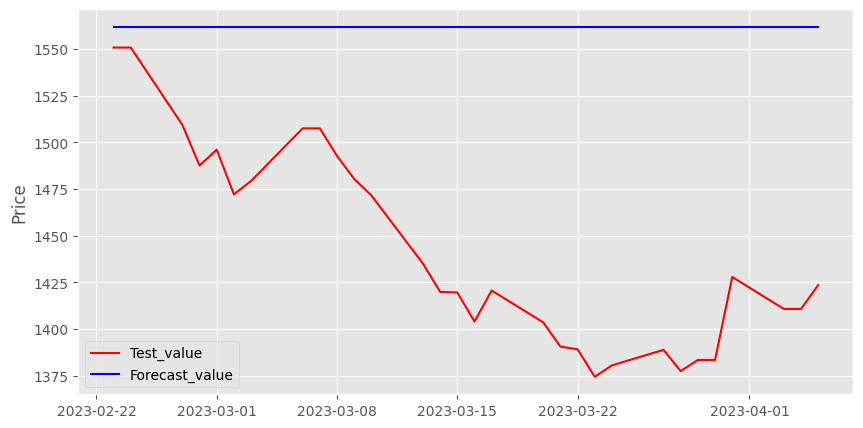

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(test,'r')
plt.plot(forecast_test,'b')
plt.ylabel('Price')
plt.legend(['Test_value','Forecast_value'])

If we increase the value of alpha it will assign the most wieght to recent obseravtions and it give the good accuracy.

##Holt Exponetial Smoothing
Holt's Exponential Smoothing, also known as Double Exponential Smoothing, is a time series forecasting method that extends Simple Exponential Smoothing (SES) by adding a trend component in addition to the level (or smoothing factor). Holt's method is capable of capturing both the level and trend in a time series, making it useful for forecasting data with both trend and level changes.

In [ ]:
from statsmodels.tsa.api import Holt
model = Holt(train)
fit_model = model.fit(smoothing_level=1,smoothing_trend = 0.5)
forecast_test = fit_model.forecast(fv)
mse_test = mean_squared_error(test, forecast_test)
mse_test

8150.229168447508

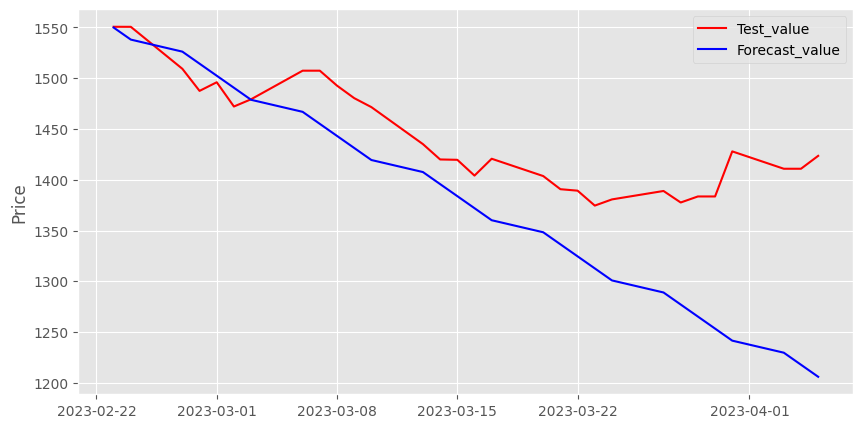

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(test,'r')
plt.plot(forecast_test,'b')
plt.ylabel('Price')
plt.legend(['Test_value','Forecast_value'])

##Holt-Winters Exponential Smoothing
Holt-Winters Exponential Smoothing, also known as Triple Exponential Smoothing, is a time series forecasting method that extends Holt's Exponential Smoothing by incorporating seasonality in addition to the level and trend components. Holt-Winters method is capable of capturing seasonality patterns in a time series, making it useful for forecasting data with recurring patterns.

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing
model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=245) 
fit_model = model.fit(smoothing_level=1,smoothing_trend=0.5,smoothing_seasonal=0.3)
# Forecast future values
forecast = fit_model.forecast(steps=fv) 
mse_test = mean_squared_error(test, forecast_test)
mse_test

8150.229168447508

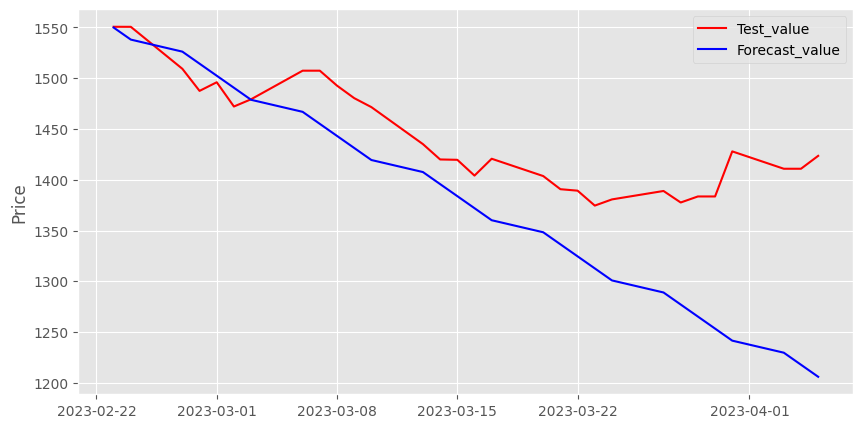

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(test,'r')
plt.plot(forecast_test,'b')
plt.ylabel('Price')
plt.legend(['Test_value','Forecast_value'])

##Moving average model
A moving average forecasting model is a simple time series forecasting technique that uses the historical average of a series of data points to make future predictions. It is often used for short-term forecasting.
Note that moving average models are simple and can work well for data with a stable trend or seasonality.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Given time series is a random walk therefore we cannot find exact value of q.
#  We try to find value of q using AIC values.
q = [1,2,3,4,5,6,7,8,9,10,11,12]
AIC = []
for i in q:
  model = SARIMAX(train,order=(0,1,i))
  model=model.fit(disp=False)
  AIC.append(model.aic)

In [ ]:
min(AIC) # this is corresponding to q = 9.

20778.394829454628

In [ ]:
model = SARIMAX(train,order=(0,1,9))
model=model.fit(disp=False)

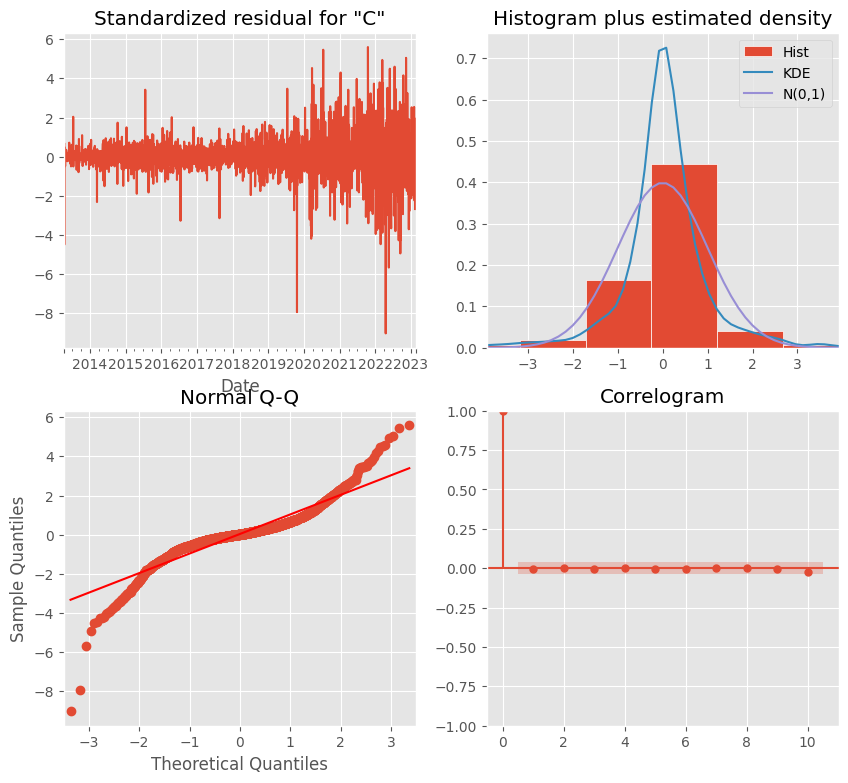

In [ ]:
model.plot_diagnostics(figsize=(10,9))
plt.show()

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(model.resid, lags=[1,2,3,4,5,6,7,8,9,10,11,12], return_df=True)

lb_stat  lb_pvalue
1   0.042556   0.836564
2   0.081530   0.960055
3   0.082630   0.993837
4   0.194045   0.995587
5   3.356867   0.645147
6   3.358826   0.762648
7   3.384161   0.847338
8   3.390887   0.907491
9   3.393897   0.946614
10  4.313335   0.932107
11  4.367080   0.957924
12  4.529206   0.971888

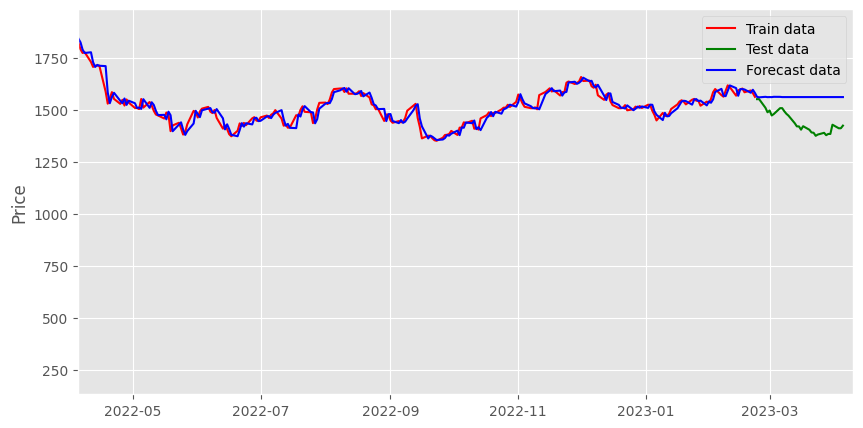

In [ ]:
predictions = model.predict(start='2013-04-05',end='2023-04-05')
plt.figure(figsize=(10,5))
plt.plot(train,'r')
plt.plot(test,'g')
plt.plot(predictions[1:],'b')
x_min = datetime.strptime('2022-04-05', "%Y-%m-%d") 
x_max = datetime.strptime('2023-04-10', "%Y-%m-%d")
plt.xlim([x_min,x_max])
plt.ylabel('Price')
plt.legend(['Train data','Test data','Forecast data'])

In [ ]:
ma_train_error1 = metrics.mean_squared_error(predictions.iloc[:len(train)],train)
ma_train_error2 = metrics.mean_absolute_error(predictions.iloc[:len(train)],train)
ma_test_error1 = metrics.mean_squared_error(predictions.iloc[len(train):],test)
ma_test_error2 = metrics.mean_absolute_error(predictions.iloc[len(train):],test)

##Autoregression model
An autoregression model, often referred to as an autoregressive model or AR model, is a type of time series forecasting model that uses the values of the same variable from previous time steps to make predictions about future values. It is a type of linear regression model where the input features are the lagged values of the target variable itself.
They are widely used in time series analysis and forecasting tasks, especially when there is evidence of autocorrelation in the data, meaning that past values of the variable are correlated with its future values.

In [ ]:
# Given time series is a random walk therefore we cannot find exact value of p from pacf.
# We try to find value of q using AIC values.
p = [1,2,3,4,5,6,7,8,9,10]
AIC = []
for i in p:
  model = SARIMAX(train,order=(i,1,0))
  model=model.fit()
  AIC.append(model.aic)

In [ ]:
# lowest value of AIC corresponding to p = 9
model = SARIMAX(train,order=(9,1,0))
model=model.fit()

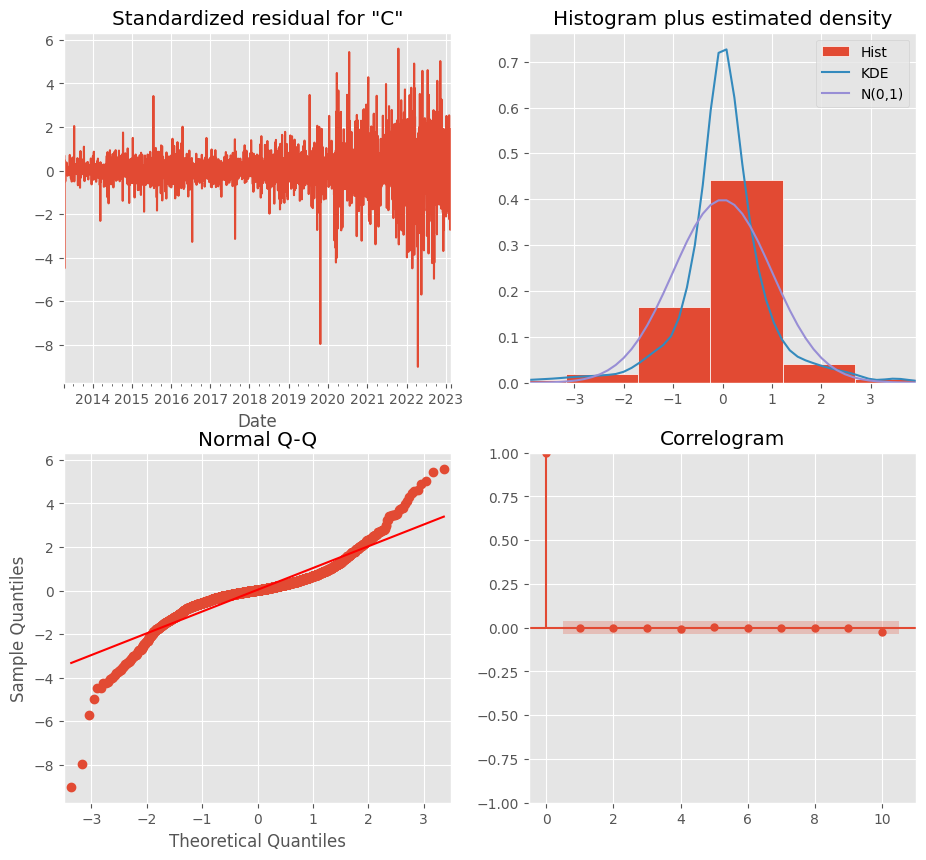

In [ ]:
model.plot_diagnostics(figsize=(11,10))
plt.show()

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(model.resid, lags=[1,2,3,4,5,6,7,8,9,10], return_df=True)

lb_stat  lb_pvalue
1   0.009935   0.920603
2   0.086944   0.957459
3   0.089678   0.993047
4   0.090852   0.998999
5   2.437320   0.785904
6   2.464118   0.872462
7   2.546043   0.923590
8   2.611894   0.956309
9   2.611935   0.977720
10  3.868238   0.953095

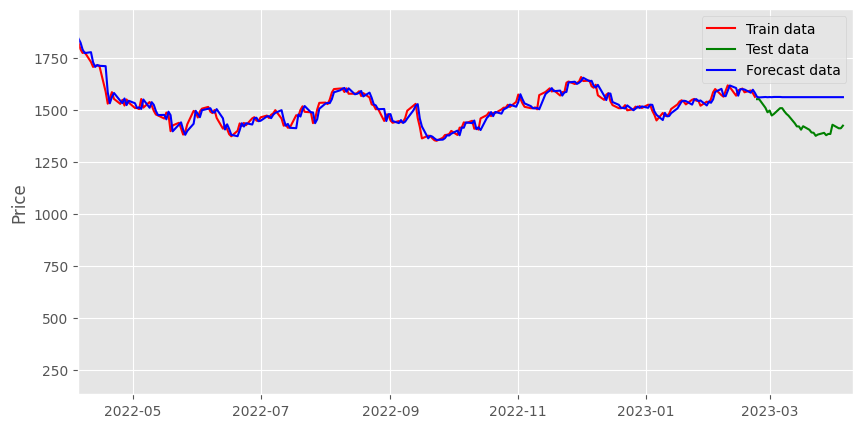

In [ ]:
predictions = model.predict(start='2013-04-05',end='2023-04-05')
plt.figure(figsize=(10,5))
plt.plot(train,'r')
plt.plot(test,'g')
plt.plot(predictions[1:],'b')
x_min = datetime.strptime('2022-04-05', "%Y-%m-%d") 
x_max = datetime.strptime('2023-04-10', "%Y-%m-%d")
plt.xlim([x_min,x_max])
plt.ylabel('Price')
plt.legend(['Train data','Test data','Forecast data'])

In [ ]:
ar_train_error1 = metrics.mean_squared_error(predictions.iloc[:len(train)],train)
ar_train_error2 = metrics.mean_absolute_error(predictions.iloc[:len(train)],train)
ar_test_error1 = metrics.mean_squared_error(predictions.iloc[len(train):],test)
ar_test_error2 = metrics.mean_absolute_error(predictions.iloc[len(train):],test)

##ARIMA
ARIMA, which stands for Autoregressive Integrated Moving Average, is a popular and widely used time series forecasting model that combines autoregressive (AR), moving average (MA), and integrated (I) components to make predictions. ARIMA is a generalization of the autoregressive (AR) and moving average (MA) models, and it is capable of capturing both trend and seasonality in time series data.

The ARIMA model requires careful selection of the order of autoregression (p), differencing (d), and moving average (q) components, which can be determined through techniques like visual inspection of time series plots, autocorrelation function (ACF) and partial autocorrelation function (PACF) analysis, and model evaluation using metrics like mean squared error (MSE), root mean squared error (RMSE), or mean absolute error (MAE).

In [ ]:
model = SARIMAX(train,order=(9,1,9))
model=model.fit(disp=False)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


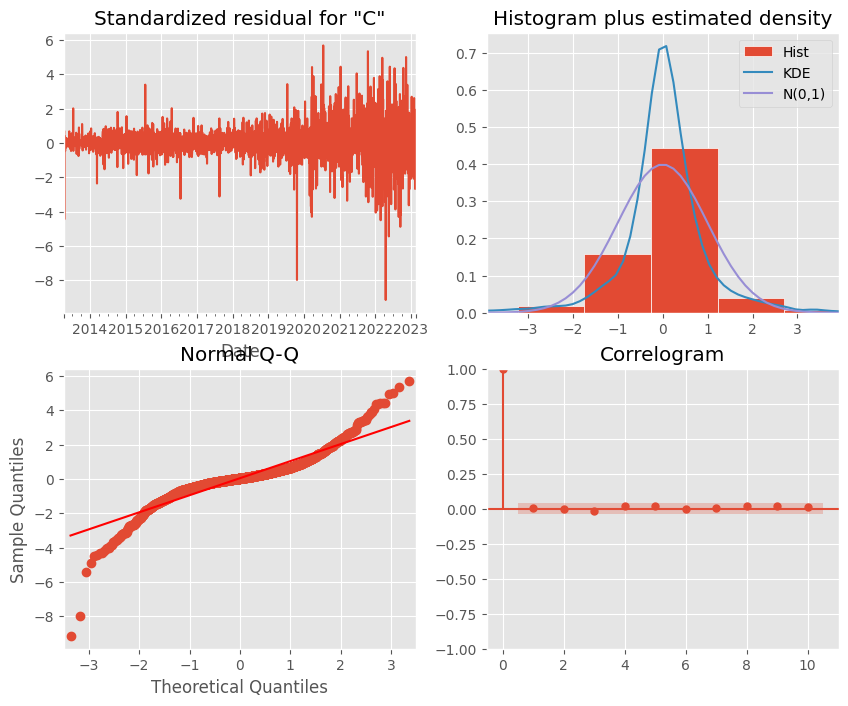

In [ ]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(model.resid, lags=[1,2,3,4,5,6,7,8,9,10], return_df=True)

lb_stat  lb_pvalue
1   0.063764   0.800643
2   0.194987   0.907108
3   0.486502   0.921847
4   1.475322   0.831004
5   1.980609   0.851822
6   1.988171   0.920783
7   2.013846   0.959070
8   2.549601   0.959378
9   3.231971   0.954383
10  3.459182   0.968466

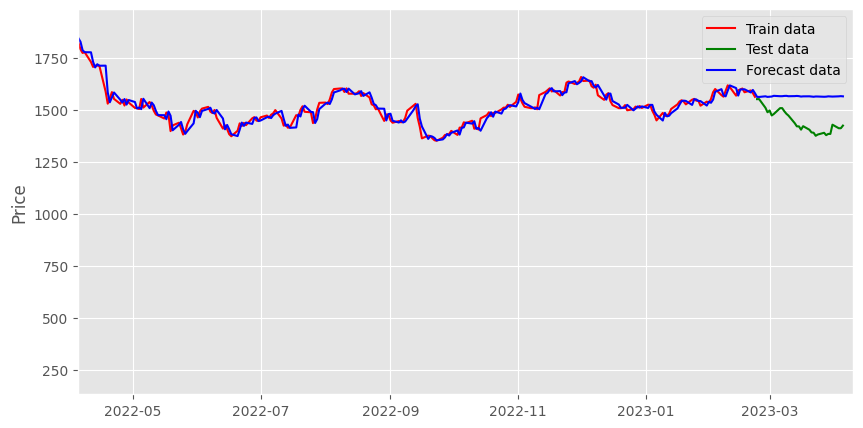

In [ ]:
predictions = model.predict(start='2013-04-05',end='2023-04-05')
plt.figure(figsize=(10,5))
plt.plot(train,'r')
plt.plot(test,'g')
plt.plot(predictions[1:],'b')
x_min = datetime.strptime('2022-04-05', "%Y-%m-%d") 
x_max = datetime.strptime('2023-04-10', "%Y-%m-%d")
plt.xlim([x_min,x_max])
plt.ylabel('Price')
plt.legend(['Train data','Test data','Forecast data'])
plt.show()

In [ ]:
arima_train_error1 = metrics.mean_squared_error(predictions.iloc[:len(train)],train)
arima_train_error2 = metrics.mean_absolute_error(predictions.iloc[:len(train)],train)
arima_test_error1 = metrics.mean_squared_error(predictions.iloc[len(train):],test)
arima_test_error2 = metrics.mean_absolute_error(predictions.iloc[len(train):],test)

##SARIMA
SARIMA, which stands for Seasonal Autoregressive Integrated Moving Average, is an extension of the ARIMA model that incorporates seasonality in time series data. It is particularly useful for forecasting time series data with repeating patterns or seasonal fluctuations. SARIMA model takes into account both the autoregressive (AR), integrated (I), and moving average (MA) components, as well as the seasonal components of autoregression (SAR), seasonal differencing (SI), and seasonal moving average (SMA).
SARIMA(p, d, q)(P, D, Q, m).


If we consider seasonality per year, then period becomes 245 days, which is a very time-consuming process to build a SARIMA model. Instead of that, I aggregate data monthly and check for yearly seasonality. If present, then I can set the period = 12 months.

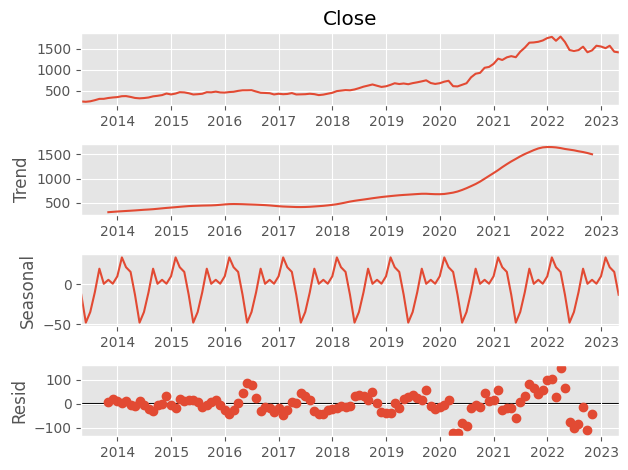

In [ ]:
data = df1.Close.resample('M').mean()
from statsmodels.tsa.seasonal import seasonal_decompose
seasonality = seasonal_decompose(data,model='additive')
seasonality.plot();

In [ ]:
train1,test1 = data.iloc[:-1],data.iloc[-1:]
model = SARIMAX(train,order=(1,1,1),seasonal_order = (1,1,1,12))
model=model.fit(disp=False)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


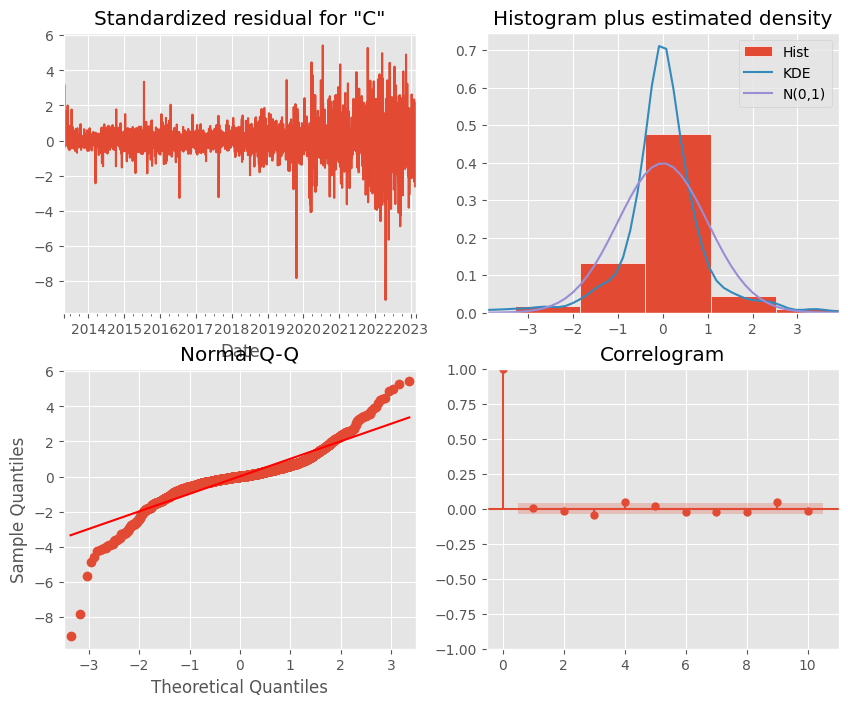

In [ ]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(model.resid, lags=[1,2,3,4,5,6,7,8,9,10], return_df=True)

lb_stat  lb_pvalue
1    0.000825   0.977090
2    0.573232   0.750800
3    2.836092   0.417593
4    7.926910   0.094293
5    9.695400   0.084341
6   10.359274   0.110315
7   10.510217   0.161456
8   11.916965   0.154947
9   15.158572   0.086671
10  15.424626   0.117331

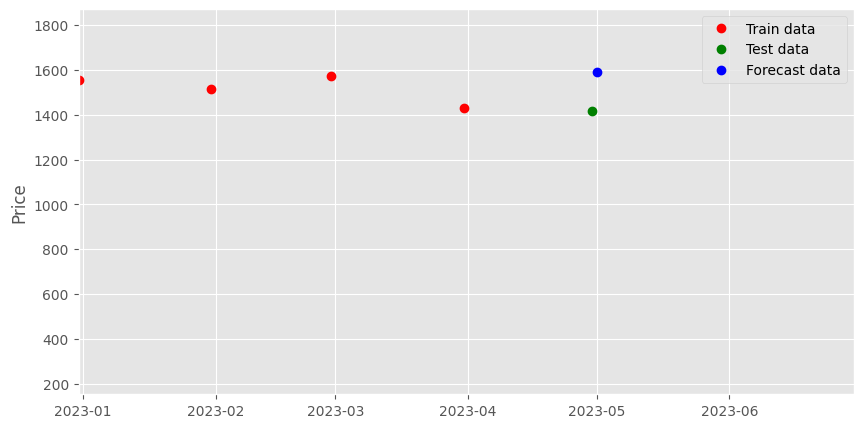

In [ ]:
predictions = model.predict(start='2023-04-30',end='2023-04-30')
plt.figure(figsize=(10,5))
plt.plot(train1,'ro')
plt.plot(test1,'go')
plt.plot(predictions,'bo')
x_min = datetime.strptime('2022-12-31', "%Y-%m-%d") 
x_max = datetime.strptime('2023-06-30', "%Y-%m-%d")
plt.xlim([x_min,x_max])
plt.ylabel('Price')
plt.legend(['Train data','Test data','Forecast data'])
plt.show()

In [ ]:
sarima_test_error1 = metrics.mean_squared_error(predictions,test1)
sarima_test_error2 = metrics.mean_absolute_error(predictions,test1)

##Prophet
Prophet is a popular open-source forecasting model developed by Facebook that is designed to handle time series data with multiple seasonality components and outliers. It is particularly well-suited for forecasting data with daily, weekly, and yearly patterns, and it can also handle missing data and outliers in the time series.

Prophet is based on an additive model, where the time series data is modeled as the sum of trend, seasonality, and holiday components, along with an error term. The model can be used to forecast future values of the time series data based on the observed historical data.

In [ ]:
df1=df.loc[df['Company_name']=='INFOSYS']
df1.set_index('Date',inplace = True)
df1 = df1.asfreq('b','ffill')
train = df1.loc[:'2023-02-28']
test = df1.loc['2023-03-01':]
train.reset_index(inplace = True)
test.reset_index(inplace = True)
train = train.rename(columns = {'Date':'ds','Close':'y'})
test = test.rename(columns = {'Date':'ds','Close':'y'})
train = train[['ds','y']]
test = test[['ds','y']]
from prophet import Prophet
model = Prophet()
model = model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0p8n052q/tgzqb305.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0p8n052q/vfzjim6g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95669', 'data', 'file=/tmp/tmp0p8n052q/tgzqb305.json', 'init=/tmp/tmp0p8n052q/vfzjim6g.json', 'output', 'file=/tmp/tmp0p8n052q/prophet_modelpd01fvh6/prophet_model-20230425124900.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:49:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:49:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
from datetime import timedelta, date
def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)
weekdays = [6,7]
dates = []
for dt in daterange(date(2013,4,5),date(2023,4,5,)):
    if dt.isoweekday() not in weekdays:
        dates.append(dt.strftime("%Y-%m-%d"))

In [ ]:
df_test = pd.DataFrame(dates)
df_test.columns = ['ds']
model_pred = model.predict(df_test)

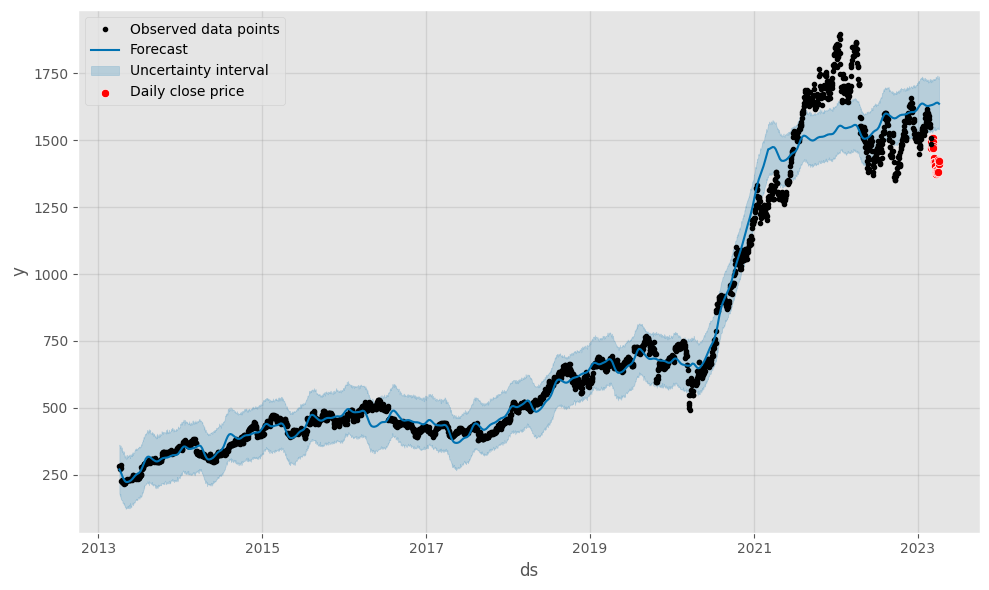

In [ ]:
plot_pred = model.plot(model_pred)
sns.scatterplot(x = 'ds', y = 'y', data = test, color = 'r', label = 'Daily close price')
x_min = datetime.strptime('2021-12-31', "%Y-%m-%d") 
x_max = datetime.strptime('2023-06-30', "%Y-%m-%d")
#plt.xlim([x_min,x_max])

In [ ]:
prediction = model_pred['yhat']
train = train['y']
test = test['y']

In [ ]:
prophet_train_error1 = metrics.mean_squared_error(prediction[:len(train)],train)
prophet_train_error2 = metrics.mean_absolute_error(prediction.iloc[:len(train)],train)
prophet_test_error1 = metrics.mean_squared_error(prediction.iloc[len(train):],test)
prophet_test_error2 = metrics.mean_absolute_error(prediction.iloc[len(train):],test)

In [ ]:
#https://colab.research.google.com/drive/136WNAwoZ0D5zoMkkU5B8QcAiU6mjeR5c#scrollTo=npYg_76ok2zI&uniqifier=1

# https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

#Deep Learning Forecosting


##LSTM
LSTM is designed to capture long-term dependencies and patterns in sequential data by using specialized memory cells that can store and retrieve information over longer time horizons. This makes LSTM particularly well-suited for modeling time series data, which often exhibit complex temporal dependencies and patterns.

LSTM has been widely used in various time series forecasting applications, including stock price prediction, energy demand forecasting, weather forecasting, and natural language processing, among others. It is implemented in popular deep learning frameworks such as TensorFlow and Keras,

In [ ]:
# univariate multi-step vector-output stacked lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [ ]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
  X, y = list(), list()
  for i in range(len(sequence)):
    # find the end of this pattern
    end_ix = i + n_steps_in
    out_end_ix = end_ix + n_steps_out
    # check if we are beyond the sequence
    if out_end_ix > len(sequence):
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)

In [ ]:
train = df1.loc[:'2023-02-28']
test = df1.loc['2023-03-01':]
Close = list(df1.Close)
train = Close[:len(train)]
test = Close[len(train):]
n_steps_in = 26
n_steps_out = 26
X, y = split_sequence(train, n_steps_in, n_steps_out)

In [ ]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [ ]:
# demonstrate prediction
x_input = array(train[-len(test):])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[1383.2217 1541.2394 1584.6605 1561.1615 1527.4934 1601.4745 1532.651
  1490.2574 1469.5552 1469.1774 1524.299  1519.2017 1552.5819 1565.2228
  1579.7648 1532.557  1544.2186 1576.6898 1606.213  1563.9205 1519.5305
  1551.7645 1590.6887 1571.6514 1569.3036 1550.1996]]


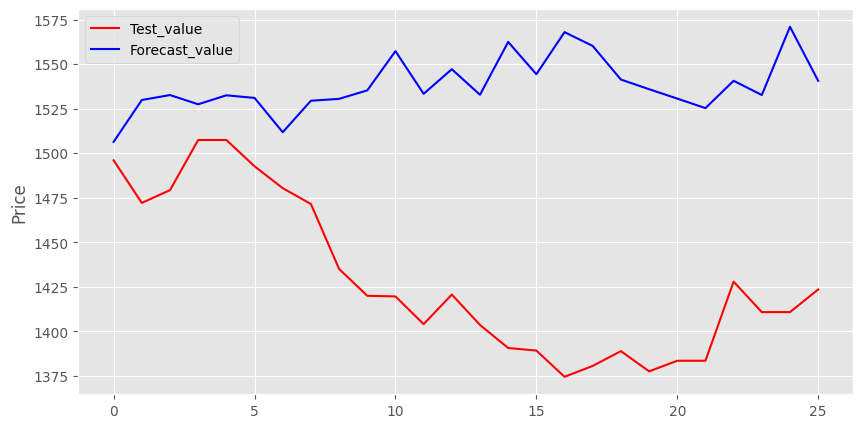

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(test,'r')
plt.plot(list(yhat.reshape(26)),'b')
plt.ylabel('Price')
plt.legend(['Test_value','Forecast_value'])
plt.show()

In [ ]:
LSTM_test_error1 = metrics.mean_squared_error(list(yhat.reshape(26)),test)
LSTM_test_error2 = metrics.mean_absolute_error(list(yhat.reshape(26)),test)

##Model Evaluation

In [ ]:
Model_name = ['Moving Average','Autoregression','ARIMA','SARIMA','Prophet','LSTM']
Mean_square_error = [ma_test_error1,ar_test_error1,arima_test_error1,sarima_test_error1,prophet_test_error1,LSTM_test_error1]
Mean_absolute_error = [ma_test_error2,ar_test_error2,arima_test_error2,sarima_test_error2,prophet_test_error2,LSTM_test_error2]

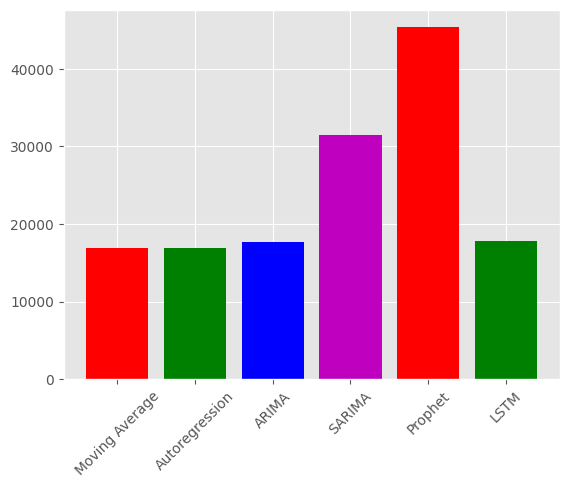

In [ ]:
plt.bar(Model_name,Mean_square_error,color = ['r','g','b','m','r','g'])
plt.xticks(rotation=45)
plt.show()

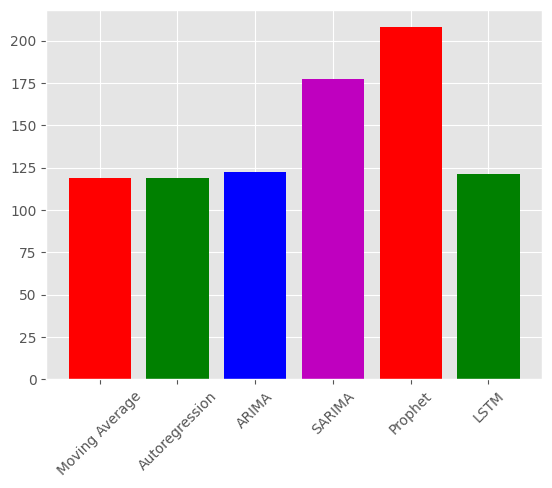

In [ ]:
plt.bar(Model_name,Mean_absolute_error,color = ['r','g','b','m','r','g'])
plt.xticks(rotation=45)
plt.show()